# Import Library

In [6]:
import pandas as pd
import numpy as np
import re
from pymongo import MongoClient
import sys
import os
import ast
import torch

code_path = os.path.abspath('../')
sys.path.append(code_path)

from credentials import connection_string

In [7]:
print(sys.path)

['c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\python310.zip', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\DLLs', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu', '', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib\\site-packages', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib\\site-packages\\win32', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Kalea\\miniconda3\\envs\\torch_gpu\\lib\\site-packages\\setuptools\\_vendor', "d:\\Kalea's\\Kuliah\\Tugas Akhir\\Code\\Code", "d:\\Kalea's\\Kuliah\\Tugas Akhir\\Code\\Code", "d:\\Kalea's\\Kuliah\\Tugas Akhir\\Code\\Code", "d:\\Kalea's\\Kuliah\\Tugas Akhir\\Code", "d:\\Kalea's\\Kuliah\\Tugas Akhir\\Code"]


In [8]:
# Check if CUDA is available
if torch.cuda.is_available():
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No CUDA devices available.")

Number of CUDA devices: 1
Device 0: NVIDIA GeForce RTX 4060 Laptop GPU


# Import Data

## Connect to MongoDB Cluster

In [9]:
database_name = "Singaraja"
collection_name = f"{database_name}_Raw"

In [10]:
client = MongoClient(connection_string)
db = client[database_name]
collection = db[collection_name]

## Get All Documents from Selected Collection

In [11]:
all_documents = collection.find()

## Convert to DataFrame

In [12]:
df = pd.DataFrame(list(all_documents))

# drop _id
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

In [13]:
df

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']","['I Made Bagiarta~Hakim Ketua~Ya', 'Anak Agung...",3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
1,Minutasi,118/Pid.Sus/2024/PN Sgr,Narkotika,"Senin, 05 Agu. 2024",44 Hari,['I NYOMAN SUARTA'],"['I MADE SUTAPA,S.H.']","['I Made Bagiarta~Hakim Ketua~Tidak', 'Ni Made...",3,['I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\...,MENGADILI:\nMenyatakan Terdakwa I NYOMAN SUART...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
2,Minutasi,114/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",48 Hari,['RICO JAYADI'],"['I MADE SUTAPA,S.H.']","['I Made Bagiarta~Hakim Ketua~Ya', 'I Gusti Ay...",3,['RICO JAYADI~Subsider Penjara (3 Bulan )\nPid...,MENGADILI:\nMenyatakan Terdakwa Rico Jayadi te...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
3,Minutasi,115/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['SANG PUTU WIDIANA'],"['Isnarti Jayaningsih, S.H.']","['I Gusti Made Juliartawan~Hakim Ketua~Tidak',...",4,['SANG PUTU WIDIANA~Subsider Penjara (2 Bulan ...,MENGADILI:\nMenyatakan Terdakwa SANG PUTU WIDI...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
4,Minutasi,116/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['WAYAN DARNA MASTONO'],"['Isnarti Jayaningsih, S.H.']","['I Gusti Made Juliartawan~Hakim Ketua~Tidak',...",4,['WAYAN DARNA MASTONO~Subsider Penjara (2 Bula...,MENGADILI:\nMenyatakan Terdakwa WAYAN DARNA MA...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
...,...,...,...,...,...,...,...,...,...,...,...,...
1265,Minutasi,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,"Kamis, 07 Des. 2017",60 Hari,[Jumat Ariyanto],"[I Nyoman Sulitra, SH.,MH.]","[Ida Bagus Bama Dewa. P~Hakim Ketua~Ya, I Made...",3,[Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSu...,M E N G A D I L I\nÂ \nMenyatakan Terdakwa Jum...,Kesatu : Pasal 83 ayat (1) huruf b UU RI No. 1...
1266,Minutasi,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,"Kamis, 07 Des. 2017",48 Hari,[I KETUT ANA SAPUTRA Alias BENCUT],"[MADE ASTINI, SH.]","[Sudar~Hakim Ketua~Ya, Ni Luh Suantini~Hakim A...",1,[I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penja...,Menyatakan Terdakwa I Ketut Ana Saputra Alias ...,Perbuatan terdakwa sebagaimana diatur dan dian...
1267,Minutasi,220/Pid.B/2017/PN Sgr,Penganiayaan,"Rabu, 06 Des. 2017",57 Hari,[Sahabudin Alias Udin],"[I KETUT KINDRA, SH]","[Ni Luh Suantini~Hakim Ketua~Ya, I Gede Karang...",2,[Sahabudin Alias Udin~Pidana Penjara Waktu Ter...,M E N G A D I L I :\nÂ \n1. Menyatakan terdakw...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...
1268,Minutasi,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,"Rabu, 06 Des. 2017",91 Hari,[Putu Kristian Damanta],"[I GUSTI ARYA WIDNYANA, SH.]","[A.A. Sagung Yuni Wulantrisna~Hakim Ketua~Ya, ...",4,[Putu Kristian Damanta~Pidana Penjara Waktu Te...,"1. Menyatakan Terdakwa Putu Kristian Damanta ,...",Pertama : Pasal 187 ayat (1) KUHP\ndan\nKedua ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status_perkara       1270 non-null   object
 1   nomor_perkara        1270 non-null   object
 2   klasifikasi_perkara  1270 non-null   object
 3   tanggal_pendaftaran  1270 non-null   object
 4   lama_proses          1270 non-null   object
 5   terdakwa             1270 non-null   object
 6   penuntut_umum        1270 non-null   object
 7   hakim                1270 non-null   object
 8   jumlah_saksi         1270 non-null   int64 
 9   putusan_hukuman      1270 non-null   object
 10  barang_bukti         1270 non-null   object
 11  dakwaan              1267 non-null   object
dtypes: int64(1), object(11)
memory usage: 119.2+ KB


# Data Understanding

In [15]:
df.head(5)

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']","['I Made Bagiarta~Hakim Ketua~Ya', 'Anak Agung...",3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
1,Minutasi,118/Pid.Sus/2024/PN Sgr,Narkotika,"Senin, 05 Agu. 2024",44 Hari,['I NYOMAN SUARTA'],"['I MADE SUTAPA,S.H.']","['I Made Bagiarta~Hakim Ketua~Tidak', 'Ni Made...",3,['I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\...,MENGADILI:\nMenyatakan Terdakwa I NYOMAN SUART...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
2,Minutasi,114/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",48 Hari,['RICO JAYADI'],"['I MADE SUTAPA,S.H.']","['I Made Bagiarta~Hakim Ketua~Ya', 'I Gusti Ay...",3,['RICO JAYADI~Subsider Penjara (3 Bulan )\nPid...,MENGADILI:\nMenyatakan Terdakwa Rico Jayadi te...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
3,Minutasi,115/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['SANG PUTU WIDIANA'],"['Isnarti Jayaningsih, S.H.']","['I Gusti Made Juliartawan~Hakim Ketua~Tidak',...",4,['SANG PUTU WIDIANA~Subsider Penjara (2 Bulan ...,MENGADILI:\nMenyatakan Terdakwa SANG PUTU WIDI...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
4,Minutasi,116/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['WAYAN DARNA MASTONO'],"['Isnarti Jayaningsih, S.H.']","['I Gusti Made Juliartawan~Hakim Ketua~Tidak',...",4,['WAYAN DARNA MASTONO~Subsider Penjara (2 Bula...,MENGADILI:\nMenyatakan Terdakwa WAYAN DARNA MA...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...


**Dataset Features**
| Fitur | Deskripsi | Tipe Data |
|-----------------------|-----------------------------------------------------------------------|:------------:|
| `status_perkara` | Status dari perkara.| `str` |
| `nomor_perkara` | Nomor identifikasi unik untuk perkara.| `str` |
| `klasifikasi_perkara` | Kategori atau jenis perkara.| `str` |
| `tanggal_pendaftaran` | Tanggal ketika perkara didaftarkan di pengadilan.| `str` |
| `lama_proses` | Durasi waktu yang dibutuhkan untuk memproses perkara.| `str` |
| `terdakwa` | Nama individu yang didakwa dalam perkara tersebut.| `list[str]` |
| `penuntut_umum` | Nama jaksa atau penuntut yang menangani perkara.| `list[str]`  |
| `hakim` | Nama hakim yang memimpin sidang perkara.| `list[str]` |
| `jumlah_saksi` | Total jumlah saksi yang dihadirkan dalam sidang.| `int` |
| `putusan_hukuman` | Putusan atau keputusan yang dijatuhkan oleh hakim.| `list[str]` |
| `barang_bukti` | Amar Putusan yang berisi tentang barang bukti perkara.| `str` |
| `dakwaan`| Uraian mengenai tuduhan atau dakwaan yang diajukan terhadap terdakwa.| `str` |







# Data Preprocessing

## Data Cleaning

### Data Cleaning: Null Values

In [16]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
status_perkara         0
nomor_perkara          0
klasifikasi_perkara    0
tanggal_pendaftaran    0
lama_proses            0
terdakwa               0
penuntut_umum          0
hakim                  0
jumlah_saksi           0
putusan_hukuman        0
barang_bukti           0
dakwaan                3
dtype: int64


In [17]:
# Print rows with any null values
null_rows = df[df.isnull().any(axis=1)]

print("Rows with null values:")
print(null_rows)


Rows with null values:
    status_perkara            nomor_perkara klasifikasi_perkara  \
107       Minutasi    151/Pid.B/2023/PN Sgr        Penganiayaan   
135       Minutasi  116/Pid.Sus/2023/PN Sgr           Narkotika   
145       Minutasi    101/Pid.B/2023/PN Sgr         Penggelapan   

      tanggal_pendaftaran lama_proses                                terdakwa  \
107   Jumat, 08 Des. 2023     70 Hari               ['NENGAH IRPAN RUSMAWAN']   
135  Selasa, 17 Okt. 2023     58 Hari  ['K. DEKY CHRISTINA ARTHA Alias DEKY']   
145   Senin, 02 Okt. 2023     59 Hari     ['GEDE SUMARDANA PUTRA alias DESU']   

                                 penuntut_umum  \
107                  ['GEDE PUTU ASTAWA,S.H.']   
135  ['I MADE HERI PERMANA PUTRA, S.H., M.H.']   
145                  ['MADE JUNI ARTINI.S.H.']   

                                                 hakim  jumlah_saksi  \
107  ['Heriyanti~Hakim Ketua~Ya', 'Ni Made Kushanda...             6   
135  ['Heriyanti~Hakim Ketua~Ya', 'I G

In [18]:
df_copy = df.dropna()
# Check for null values in the entire DataFrame
null_counts = df_copy.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
status_perkara         0
nomor_perkara          0
klasifikasi_perkara    0
tanggal_pendaftaran    0
lama_proses            0
terdakwa               0
penuntut_umum          0
hakim                  0
jumlah_saksi           0
putusan_hukuman        0
barang_bukti           0
dakwaan                0
dtype: int64


### Data Cleaning: Data Disamarkan

In [19]:
count_disamarkan = df_copy[df_copy["dakwaan"].str.lower().isin(["disamarkan"])]

# Print the count
print(f"Jumlah data 'Disamarkan': {count_disamarkan.shape[0]}")


Jumlah data 'Disamarkan': 100


In [20]:
print(count_disamarkan)


     status_perkara            nomor_perkara           klasifikasi_perkara  \
36         Minutasi   73/Pid.Sus/2024/PN Sgr             Perlindungan Anak   
44         Minutasi   62/Pid.Sus/2024/PN Sgr             Perlindungan Anak   
67         Minutasi   37/Pid.Sus/2024/PN Sgr             Perlindungan Anak   
76         Minutasi   27/Pid.Sus/2024/PN Sgr             Perlindungan Anak   
102        Minutasi  155/Pid.Sus/2023/PN Sgr             Perlindungan Anak   
...             ...                      ...                           ...   
1116       Minutasi  144/Pid.Sus/2018/PN Sgr  Kekerasan Dalam Rumah Tangga   
1183       Minutasi   64/Pid.Sus/2018/PN Sgr             Perlindungan Anak   
1231       Minutasi   18/Pid.Sus/2018/PN Sgr  Kekerasan Dalam Rumah Tangga   
1244       Minutasi    1/Pid.Sus/2018/PN Sgr             Perlindungan Anak   
1253       Minutasi  241/Pid.Sus/2017/PN Sgr  Kekerasan Dalam Rumah Tangga   

       tanggal_pendaftaran lama_proses        terdakwa  \
36   

In [21]:
df_copy = df_copy[~df_copy["dakwaan"].str.lower().isin(["disamarkan"])]
df_copy.reset_index(drop=True, inplace=True)

In [22]:
count_disamarkan = df_copy[df_copy["dakwaan"].str.lower().isin(["disamarkan"])]

# Print the count
print(f"Jumlah data 'Disamarkan': {count_disamarkan.shape[0]}")

Jumlah data 'Disamarkan': 0


### Data Cleaning: Status Perkara

In [23]:
unique_status_perkara_values = df_copy['status_perkara'].unique()
num_unique_status_perkara = len(unique_status_perkara_values)

print(f"Number of unique values in 'status_perkara': {num_unique_status_perkara}")
print("Unique values:", unique_status_perkara_values)


Number of unique values in 'status_perkara': 1
Unique values: ['Minutasi']


### Data Cleaning: Nomor Perkara

In [24]:
unique_nomor_perkara_values = df_copy['nomor_perkara'].unique()
num_unique_nomor_perkara = len(unique_nomor_perkara_values)

print(f"Jumlah Data: {len(df_copy)}")
print(f"Jumlah Nilai Unique pada Kolom 'nomor_perkara': {num_unique_nomor_perkara}")

Jumlah Data: 1167
Jumlah Nilai Unique pada Kolom 'nomor_perkara': 1167


### Data Cleaning: Klasifikasi Perkara

In [25]:
unique_klasifikasi_perkara_values = df_copy['klasifikasi_perkara'].unique()
num_unique_klasifikasi_perkara = len(unique_klasifikasi_perkara_values)
unique_klasifikasi_counts = df_copy['klasifikasi_perkara'].value_counts()

print(f"Number of unique values in 'status_perkara': {num_unique_klasifikasi_perkara}")
print(unique_klasifikasi_counts)

Number of unique values in 'status_perkara': 36
klasifikasi_perkara
Pencurian                                                                                               332
Narkotika                                                                                               323
Penganiayaan                                                                                            104
Penggelapan                                                                                              88
Lalu Lintas                                                                                              76
Kejahatan Perjudian                                                                                      63
Lain-Lain                                                                                                55
Penipuan                                                                                                 28
Pembunuhan                                                          

In [26]:
df_copy = df_copy[~df_copy["klasifikasi_perkara"].isin(["Lalu Lintas"])]
df_copy.reset_index(drop=True, inplace=True)

In [27]:
unique_klasifikasi_perkara_values = df_copy['klasifikasi_perkara'].unique()
num_unique_klasifikasi_perkara = len(unique_klasifikasi_perkara_values)
unique_klasifikasi_counts = df_copy['klasifikasi_perkara'].value_counts()

print(f"Number of unique values in 'status_perkara': {num_unique_klasifikasi_perkara}")
print(unique_klasifikasi_counts)

Number of unique values in 'status_perkara': 35
klasifikasi_perkara
Pencurian                                                                                               332
Narkotika                                                                                               323
Penganiayaan                                                                                            104
Penggelapan                                                                                              88
Kejahatan Perjudian                                                                                      63
Lain-Lain                                                                                                55
Penipuan                                                                                                 28
Pembunuhan                                                                                               11
Tindak Pidana Senjata Api atau Benda Tajam                          

### Data Cleaning: Hakim

In [28]:
# Count unique data types in the column
unique_types = df_copy['hakim'].apply(type).unique()

# Display the unique types
print(f"Unique data types in the column: {unique_types}")

Unique data types in the column: [<class 'str'> <class 'list'>]


In [29]:
count_str_hakim = df_copy[df_copy["hakim"].apply(lambda x: isinstance(x, str))].shape[0]
print(f"Jumlah data dengan 'hakim' berupa string: {count_str_hakim}")


Jumlah data dengan 'hakim' berupa string: 157


In [30]:
for index, row in df_copy.iterrows():
    value = row["hakim"]
    
    # If the value is a string representation of a list, convert it back to a list
    if isinstance(value, str):
        try:
            print(f"Type: {type(value)}, Row {index} - Value: {value}")
            value = ast.literal_eval(value)  # Convert the string back to a list
            df_copy.at[index, "hakim"] = value  # Update the value in the DataFrame
            print(f"Type: {type(value)}, Row {index} - Value: {value}\n")
            
        except (ValueError, SyntaxError):
            print(f"Error in Row {index}: Not a valid list format.")
    

Type: <class 'str'>, Row 0 - Value: ['I Made Bagiarta~Hakim Ketua~Ya', 'Anak Agung Ayu Sri Sudanthi~Hakim Anggota~Ya', 'Pulung Yustisia Dewi~Hakim Anggota~Ya']
Type: <class 'list'>, Row 0 - Value: ['I Made Bagiarta~Hakim Ketua~Ya', 'Anak Agung Ayu Sri Sudanthi~Hakim Anggota~Ya', 'Pulung Yustisia Dewi~Hakim Anggota~Ya']

Type: <class 'str'>, Row 1 - Value: ['I Made Bagiarta~Hakim Ketua~Tidak', 'Ni Made Kushandari~Hakim Anggota~Tidak', 'Made Astina Dwipayana~Hakim Anggota~Tidak', 'I Made Bagiarta~Hakim Ketua~Ya', 'Ni Made Kushandari~Hakim Anggota~Ya', 'Ni Putu Asih Yudiastri~Hakim Anggota~Ya']
Type: <class 'list'>, Row 1 - Value: ['I Made Bagiarta~Hakim Ketua~Tidak', 'Ni Made Kushandari~Hakim Anggota~Tidak', 'Made Astina Dwipayana~Hakim Anggota~Tidak', 'I Made Bagiarta~Hakim Ketua~Ya', 'Ni Made Kushandari~Hakim Anggota~Ya', 'Ni Putu Asih Yudiastri~Hakim Anggota~Ya']

Type: <class 'str'>, Row 2 - Value: ['I Made Bagiarta~Hakim Ketua~Ya', 'I Gusti Ayu Kade Ari Wulandari~Hakim Anggota~Ya', 

In [31]:
# Count unique data types in the column
unique_types = df_copy['hakim'].apply(type).unique()

# Display the unique types
print(f"Unique data types in the column: {unique_types}")

Unique data types in the column: [<class 'list'>]


In [32]:
unique_types = df_copy['hakim'].apply(len).unique()
print(unique_types)

[3 6 9]


In [33]:
for index, row in df_copy.iterrows():
    if len(row["hakim"]) == 6: 
        print(f"{index} -> {row['hakim']}")

1 -> ['I Made Bagiarta~Hakim Ketua~Tidak', 'Ni Made Kushandari~Hakim Anggota~Tidak', 'Made Astina Dwipayana~Hakim Anggota~Tidak', 'I Made Bagiarta~Hakim Ketua~Ya', 'Ni Made Kushandari~Hakim Anggota~Ya', 'Ni Putu Asih Yudiastri~Hakim Anggota~Ya']
3 -> ['I Gusti Made Juliartawan~Hakim Ketua~Tidak', 'Ni Made Kushandari~Hakim Anggota~Tidak', 'Made Astina Dwipayana~Hakim Anggota~Tidak', 'I Gusti Made Juliartawan~Hakim Ketua~Ya', 'Ni Made Kushandari~Hakim Anggota~Ya', 'Ni Putu Asih Yudiastri~Hakim Anggota~Ya']
4 -> ['I Gusti Made Juliartawan~Hakim Ketua~Tidak', 'Ni Made Kushandari~Hakim Anggota~Tidak', 'Made Astina Dwipayana~Hakim Anggota~Tidak', 'I Gusti Made Juliartawan~Hakim Ketua~Ya', 'Ni Made Kushandari~Hakim Anggota~Ya', 'Ni Putu Asih Yudiastri~Hakim Anggota~Ya']
7 -> ['I Made Bagiarta~Hakim Ketua~Tidak', 'I Gusti Made Juliartawan~Hakim Anggota~Tidak', 'Ni Putu Asih Yudiastri~Hakim Anggota~Tidak', 'I Made Bagiarta~Hakim Ketua~Ya', 'I Gusti Made Juliartawan~Hakim Anggota~Ya', 'I Gusti A

In [34]:
for index, row in df_copy.iterrows():
    if len(row["hakim"]) == 9: 
        print(f"{index} -> {row['hakim']}")

537 -> ['I Gede Yuliartha~Hakim Ketua~Tidak', 'A.A. Ayu Merta Dewi~Hakim Anggota~Tidak', 'Anak Agung Ngurah Budhi Dharmawan~Hakim Anggota~Tidak', 'I Gede Yuliartha~Hakim Ketua~Tidak', 'Anak Agung Ngurah Budhi Dharmawan~Hakim Anggota~Tidak', 'Wayan Eka Satria Utama~Hakim Anggota~Tidak', 'I Gede Yuliartha~Hakim Ketua~Ya', 'Anak Agung Ngurah Budhi Dharmawan~Hakim Anggota~Ya', 'I Nyoman Dipa Rudiana~Hakim Anggota~Ya']


In [35]:
for index, row in df_copy.iterrows():
    i = len(row["hakim"])
    for j in range(i):
        print(row["hakim"][j])
    print("")

I Made Bagiarta~Hakim Ketua~Ya
Anak Agung Ayu Sri Sudanthi~Hakim Anggota~Ya
Pulung Yustisia Dewi~Hakim Anggota~Ya

I Made Bagiarta~Hakim Ketua~Tidak
Ni Made Kushandari~Hakim Anggota~Tidak
Made Astina Dwipayana~Hakim Anggota~Tidak
I Made Bagiarta~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

I Made Bagiarta~Hakim Ketua~Ya
I Gusti Ayu Kade Ari Wulandari~Hakim Anggota~Ya
Pulung Yustisia Dewi~Hakim Anggota~Ya

I Gusti Made Juliartawan~Hakim Ketua~Tidak
Ni Made Kushandari~Hakim Anggota~Tidak
Made Astina Dwipayana~Hakim Anggota~Tidak
I Gusti Made Juliartawan~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

I Gusti Made Juliartawan~Hakim Ketua~Tidak
Ni Made Kushandari~Hakim Anggota~Tidak
Made Astina Dwipayana~Hakim Anggota~Tidak
I Gusti Made Juliartawan~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

Made Hermayanti Muliartha~Hakim Ketua~Ya
Anak Agung Ayu Sri Su

In [36]:
df_copy.loc[:, 'hakim'] = df_copy['hakim'].apply(lambda x: [entry for entry in x if '~Tidak' not in entry])

In [37]:
for index, row in df_copy.iterrows():
    i = len(row["hakim"])
    for j in range(i):
        print(row["hakim"][j])
    print("")

I Made Bagiarta~Hakim Ketua~Ya
Anak Agung Ayu Sri Sudanthi~Hakim Anggota~Ya
Pulung Yustisia Dewi~Hakim Anggota~Ya

I Made Bagiarta~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

I Made Bagiarta~Hakim Ketua~Ya
I Gusti Ayu Kade Ari Wulandari~Hakim Anggota~Ya
Pulung Yustisia Dewi~Hakim Anggota~Ya

I Gusti Made Juliartawan~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

I Gusti Made Juliartawan~Hakim Ketua~Ya
Ni Made Kushandari~Hakim Anggota~Ya
Ni Putu Asih Yudiastri~Hakim Anggota~Ya

Made Hermayanti Muliartha~Hakim Ketua~Ya
Anak Agung Ayu Sri Sudanthi~Hakim Anggota~Ya
Wayan Eka Satria Utama~Hakim Anggota~Ya

I Gusti Made Juliartawan~Hakim Ketua~Ya
I Gusti Ayu Kade Ari Wulandari~Hakim Anggota~Ya
Made Astina Dwipayana~Hakim Anggota~Ya

I Made Bagiarta~Hakim Ketua~Ya
I Gusti Made Juliartawan~Hakim Anggota~Ya
I Gusti Ayu Kade Ari Wulandari~Hakim Anggota~Ya

I Gusti Ayu Kade Ari Wulandari~Hakim Ketua~Ya
Ma

In [38]:
unique_types = df_copy['hakim'].apply(len).unique()
print(unique_types)

[3]


In [39]:
unique_types = df_copy['hakim'].apply(type).unique()
print(unique_types)

[<class 'list'>]


In [40]:
df_copy.loc[:, 'hakim'] = df_copy['hakim'].apply(lambda x: [value for value in x if '~Hakim Anggota' not in value])

In [41]:
for index, row in df_copy.iterrows():
    print(row['hakim'])

['I Made Bagiarta~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['Made Hermayanti Muliartha~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Gusti Ayu Kade Ari Wulandari~Hakim Ketua~Ya']
['I Gusti Ayu Kade Ari Wulandari~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['Made Hermayanti Muliartha~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['Made Hermayanti Muliartha~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Made Bagiarta~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Gusti Made Juliartawan~Hakim Ketua~Ya']
['I Made Bagiarta~H

In [42]:
unique_types = df_copy['hakim'].apply(len).unique()
print(unique_types)

[1]


In [43]:
df_copy.loc[:, 'hakim'] = df_copy['hakim'].apply(
    lambda x: [value.split('~Hakim')[0].strip() for value in x]
)

In [44]:
for index, row in df_copy.iterrows():
    print(row['hakim'])

['I Made Bagiarta']
['I Made Bagiarta']
['I Made Bagiarta']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['Made Hermayanti Muliartha']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['I Gusti Ayu Kade Ari Wulandari']
['I Gusti Ayu Kade Ari Wulandari']
['I Made Bagiarta']
['Made Hermayanti Muliartha']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['I Made Bagiarta']
['Made Hermayanti Muliartha']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['I Made Bagiarta']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['Made Hermayanti Muliartha']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['Made Hermayanti Muliartha']
['I Made Bagiarta']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['I Made Bagiarta']
['Heriyanti']
['I Made Bagiarta']
['Made Hermayanti Muliartha']
['I Gusti Made Juliartawan']
['I Gusti Made Juliartawan']
['I Gusti Made Juliar

In [45]:
df_copy['hakim'] = df_copy['hakim'].apply(lambda x: str(x[0]) if isinstance(x, list) and len(x) > 0 else str(x))

In [46]:
unique_types = df_copy['hakim'].apply(type).unique()
print(unique_types)

[<class 'str'>]


In [47]:
for index, row in df_copy.iterrows():
    print(row['hakim'])

I Made Bagiarta
I Made Bagiarta
I Made Bagiarta
I Gusti Made Juliartawan
I Gusti Made Juliartawan
Made Hermayanti Muliartha
I Gusti Made Juliartawan
I Made Bagiarta
I Gusti Ayu Kade Ari Wulandari
I Gusti Ayu Kade Ari Wulandari
I Made Bagiarta
Made Hermayanti Muliartha
I Gusti Made Juliartawan
I Gusti Made Juliartawan
I Made Bagiarta
I Made Bagiarta
Made Hermayanti Muliartha
I Gusti Made Juliartawan
I Made Bagiarta
I Gusti Made Juliartawan
I Made Bagiarta
I Made Bagiarta
I Gusti Made Juliartawan
I Gusti Made Juliartawan
I Made Bagiarta
Made Hermayanti Muliartha
I Gusti Made Juliartawan
I Gusti Made Juliartawan
Made Hermayanti Muliartha
I Made Bagiarta
I Gusti Made Juliartawan
I Gusti Made Juliartawan
I Made Bagiarta
Heriyanti
I Made Bagiarta
Made Hermayanti Muliartha
I Gusti Made Juliartawan
I Gusti Made Juliartawan
I Gusti Made Juliartawan
Heriyanti
Ni Made Kushandari
Heriyanti
I Gusti Made Juliartawan
I Gusti Made Juliartawan
I Made Bagiarta
I Made Bagiarta
I Gusti Made Juliartawan
I 

### Data Cleaning: Barang Bukti

In [48]:
text = df_copy.iloc[-1]['barang_bukti']
print(text)

M E N G A D I L I
Menyatakan Terdakwa KETUT GELGEL ASTREA identitas seperti tersebut diatas telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana Â â€Pencurianâ€ ;
Menjatuhkan pidana kepada Terdakwa oleh karenanya Â dengan pidana penjara Â selama Â 1 (satu) tahun;
Menetapkan masa penangkapan dan penahanan yang telah dijalani Terdakwa dikurangkan seluruhnya dari pidana yang dijatuhkan ;
Menetapkan Terdakwa tetap berada dalam tahanan ;
Menetapkan barang bukti berupa ;
1 (satu) unit sepeda motor Yamaha Jupiter Z warna hitam tahun 2006 , Nomor Polisi DK 6540 UN,Noka :MH32P20026K154375, Nosin :2P2-154118;
1 (satu) lembar surat kendaraan STNK atas nama HENDRA;
Dikembalikan kepada saksi korbanÂ  GEDE AGUS DIKA ANDRIANA Â atau yang berhak;
Membebankan kepada Terdakwa untuk membayar biaya perkara sebesar Rp. 5000,- (lima ribu rupiah);Â


In [49]:
cleaned_text = re.sub(r'[^a-zA-Z0-9., /\\()\"\'\n-]+', '', text)

In [50]:
print(cleaned_text)

M E N G A D I L I
Menyatakan Terdakwa KETUT GELGEL ASTREA identitas seperti tersebut diatas telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana  Pencurian 
Menjatuhkan pidana kepada Terdakwa oleh karenanya  dengan pidana penjara  selama  1 (satu) tahun
Menetapkan masa penangkapan dan penahanan yang telah dijalani Terdakwa dikurangkan seluruhnya dari pidana yang dijatuhkan 
Menetapkan Terdakwa tetap berada dalam tahanan 
Menetapkan barang bukti berupa 
1 (satu) unit sepeda motor Yamaha Jupiter Z warna hitam tahun 2006 , Nomor Polisi DK 6540 UN,Noka MH32P20026K154375, Nosin 2P2-154118
1 (satu) lembar surat kendaraan STNK atas nama HENDRA
Dikembalikan kepada saksi korban  GEDE AGUS DIKA ANDRIANA  atau yang berhak
Membebankan kepada Terdakwa untuk membayar biaya perkara sebesar Rp. 5000,- (lima ribu rupiah)


In [51]:
cleaned_text = re.sub(r' +', ' ', cleaned_text)

In [52]:
print(cleaned_text)

M E N G A D I L I
Menyatakan Terdakwa KETUT GELGEL ASTREA identitas seperti tersebut diatas telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana Pencurian 
Menjatuhkan pidana kepada Terdakwa oleh karenanya dengan pidana penjara selama 1 (satu) tahun
Menetapkan masa penangkapan dan penahanan yang telah dijalani Terdakwa dikurangkan seluruhnya dari pidana yang dijatuhkan 
Menetapkan Terdakwa tetap berada dalam tahanan 
Menetapkan barang bukti berupa 
1 (satu) unit sepeda motor Yamaha Jupiter Z warna hitam tahun 2006 , Nomor Polisi DK 6540 UN,Noka MH32P20026K154375, Nosin 2P2-154118
1 (satu) lembar surat kendaraan STNK atas nama HENDRA
Dikembalikan kepada saksi korban GEDE AGUS DIKA ANDRIANA atau yang berhak
Membebankan kepada Terdakwa untuk membayar biaya perkara sebesar Rp. 5000,- (lima ribu rupiah)


In [53]:
pattern = r"Menetapkan barang bukti berupa\s*(.*?)(?=\n\s*[A-Z]|$)"
# pattern = r"Menetapkan barang bukti berupa\s*(.*?)(?=\n[A-Z])"
match = re.search(pattern, cleaned_text, re.DOTALL)

if match:
    print(match.group().strip())
else:
    print("Tidak ada kecocokan ditemukan.")

Menetapkan barang bukti berupa 
1 (satu) unit sepeda motor Yamaha Jupiter Z warna hitam tahun 2006 , Nomor Polisi DK 6540 UN,Noka MH32P20026K154375, Nosin 2P2-154118
1 (satu) lembar surat kendaraan STNK atas nama HENDRA


In [54]:
text = df_copy.iloc[3]['barang_bukti']
print(text)

MENGADILI:
Menyatakan Terdakwa SANG PUTU WIDIANA telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana “dengan permufakatan jahat melakukan tindak pidana narkotika dan precursor narkotika yaitu tanpa hak atau melawan hukum memiliki, menyimpan, menguasai atau menyediakan narkotika Golongan I bukan tanaman” sebagaimana  dakwaan alternatif kedua Penuntut Umum;
Menjatuhkan pidana terhadap Terdakwa berupa pidana penjara selama 4 (empat) tahun dan denda sebesar Rp800.000.000,00 (delapan ratus juta rupiah) dengan ketentuan apabila denda tersebut tidak dibayarkan diganti dengan pidana penjara selama 2 (dua) bulan;      
Menetapkan masa penangkapan dan penahanan yang telah dijalani oleh Terdakwa dikurangkan seluruhnya dari pidana penjara yang dijatuhkan;
Menetapkan Terdakwa tetap ditahan ;
Menetapkan barang bukti berupa:
1(satu) buah HP merk Realme warna hitam putih
Dirampas untuk dimusnahkan
6 (enam) Paket plastik klip bening yang berisi butiran kristal bening diduga narkot

In [55]:
patterns = [
    r"barang\s*bukti\s*berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"Barang\s*bukti\s*berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"Barang\s*Bukti\s*berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"Barang\s*Bukti\s*Berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"barang\s*Bukti\s*Berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"barang\s*bukti\s*Berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"barang\s*bukti,\s*berupa\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"barang\s*bukti\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)",
    r"barang-bukti\s*:?\s*(.*?)(?=\n\s*[A-Z]|$)"
]

# List to store indices of rows to drop
rows_to_drop = []

# Iterate over rows
for index, row in df_copy.iterrows():
    text_barang_bukti = row['barang_bukti']
    
    # Clean the 'barang_bukti' text
    cleaned_barang_bukti = re.sub(r'[^a-zA-Z0-9., /\\()\"\'\n-]+', '', text_barang_bukti)
    
    match_found = False

    # Iterate over the patterns and try to find a match
    for pattern in patterns:
        match = re.search(pattern, cleaned_barang_bukti, re.DOTALL)

        if match:
            df_copy.loc[index, 'cleaned_barang_bukti'] = match.group(1).strip().replace('\n', ' ')  # Store the match
            match_found = True
            break

    
    if not match_found:
        # Print info for unmatched rows
        print(f"{index}. Tidak ada kecocokan ditemukan. {row['nomor_perkara']}")
        rows_to_drop.append(index)  # Collect row index to drop
        print(cleaned_barang_bukti)

# Drop rows after the loop completes
df_copy.drop(rows_to_drop, inplace=True)
print(f"rows dropped: {rows_to_drop}")
print(f"rows dropped: {len(rows_to_drop)}")

36. Tidak ada kecocokan ditemukan. 68/Pid.B/2024/PN Sgr
MENGADILI
Menyatakan Terdakwa I Nyoman Eryanto Alias Munuk telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana penganiayaan sebagaimana dalam dakwaan tunggal
Menjatuhkan pidana terhadap Terdakwa dengan pidana penjara selama 4  (empat) bulan       
Menetapkan masa penangkapan dan penahanan yang telah dijalani Terdakwa dikurangkan seluruhnya dari pidana yang dijatuhkan
Menetapkan agar Terdakwa tetap ditahan
Membebankan kepada Terdakwa untuk membayar biaya perkara sebesar Rp. 5.000. (lima ribu rupiah)
100. Tidak ada kecocokan ditemukan. 149/Pid.B/2023/PN Sgr
MENGADILI
Menyatakan Terdakwa PUTU HERRY SUARTHANA Alias HERIK sebagaimana identitas tersebut di atas, telah terbukti secara sah dan meyakinkan bersalah melakukan tindak pidana penganiayaan sebagaimana dalam dakwaan tunggal  Penuntut Umum 
Menjatuhkan pidana terhadap Terdakwa oleh karena itu dengan pidana penjara selama 1 ( satu ) tahun
Menetapkan lamanya ma

In [56]:
df_copy.iloc[0]['cleaned_barang_bukti']

'1 (satu) buah papan bola bergambar 1 (satu) buah tas kain warna abu-abu 1 (satu) buah perlak bergambar 1 (satu) buah tas karung warna biru garis merah 2 (dua)  buah bola karet warna hitam 1 (satu) buah bola karet warna cokelat 1 (satu) buah bola karet warna hijau 1 (satu) buah tas kain warna hitam 4 (empat) buah kayu penyeimbang 1 (satu) botol bedak bayi 48 (empat puluh delapan) buah papan cek kayu berwarna hijau dengan nomor 5 (lima) 68 (enam puluh delapan) buah papan cek kayu berwarna merah dengan nomor 10 (sepuluh) 44 (empat puluh empat) buah papan cek kayu berwarna biru dengan nomor 20 (duapuluh) 17 (tujuh belas) buah papan cek kayu berwarna abu-abu dengan nomor 30 (tigapuluh) 17 (tujuh belas) buah papan cek kayu berwarna ungu dengan nomor 50 (limapuluh) 1 (satu) buah lap warna orange 1 (satu) buah lap warna putih kotak warna biru'

In [57]:
df_copy

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan,cleaned_barang_bukti
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah papan bola bergambar 1 (satu) bu...
1,Minutasi,118/Pid.Sus/2024/PN Sgr,Narkotika,"Senin, 05 Agu. 2024",44 Hari,['I NYOMAN SUARTA'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\...,MENGADILI:\nMenyatakan Terdakwa I NYOMAN SUART...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,38 (tiga puluh delapan) potongan pipet plastik...
2,Minutasi,114/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",48 Hari,['RICO JAYADI'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['RICO JAYADI~Subsider Penjara (3 Bulan )\nPid...,MENGADILI:\nMenyatakan Terdakwa Rico Jayadi te...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah dompet warna hijau 20 (dua puluh...
3,Minutasi,115/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['SANG PUTU WIDIANA'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['SANG PUTU WIDIANA~Subsider Penjara (2 Bulan ...,MENGADILI:\nMenyatakan Terdakwa SANG PUTU WIDI...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1(satu) buah HP merk Realme warna hitam putih
4,Minutasi,116/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['WAYAN DARNA MASTONO'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['WAYAN DARNA MASTONO~Subsider Penjara (2 Bula...,MENGADILI:\nMenyatakan Terdakwa WAYAN DARNA MA...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,6 (enam) Paket plastik klip bening yang berisi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Minutasi,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,"Kamis, 07 Des. 2017",60 Hari,[Jumat Ariyanto],"[I Nyoman Sulitra, SH.,MH.]",Ida Bagus Bama Dewa. P,3,[Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSu...,M E N G A D I L I\nÂ \nMenyatakan Terdakwa Jum...,Kesatu : Pasal 83 ayat (1) huruf b UU RI No. 1...,1 (satu) 1 (satu) batang kayu balang-balang be...
1087,Minutasi,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,"Kamis, 07 Des. 2017",48 Hari,[I KETUT ANA SAPUTRA Alias BENCUT],"[MADE ASTINI, SH.]",Sudar,1,[I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penja...,Menyatakan Terdakwa I Ketut Ana Saputra Alias ...,Perbuatan terdakwa sebagaimana diatur dan dian...,36 (tiga puluh enam) lembar kertas rekapan
1088,Minutasi,220/Pid.B/2017/PN Sgr,Penganiayaan,"Rabu, 06 Des. 2017",57 Hari,[Sahabudin Alias Udin],"[I KETUT KINDRA, SH]",Ni Luh Suantini,2,[Sahabudin Alias Udin~Pidana Penjara Waktu Ter...,M E N G A D I L I :\nÂ \n1. Menyatakan terdakw...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...
1089,Minutasi,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,"Rabu, 06 Des. 2017",91 Hari,[Putu Kristian Damanta],"[I GUSTI ARYA WIDNYANA, SH.]",A.A. Sagung Yuni Wulantrisna,4,[Putu Kristian Damanta~Pidana Penjara Waktu Te...,"1. Menyatakan Terdakwa Putu Kristian Damanta ,...",Pertama : Pasal 187 ayat (1) KUHP\ndan\nKedua ...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...


In [58]:
null_counts = df_copy.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
status_perkara          0
nomor_perkara           0
klasifikasi_perkara     0
tanggal_pendaftaran     0
lama_proses             0
terdakwa                0
penuntut_umum           0
hakim                   0
jumlah_saksi            0
putusan_hukuman         0
barang_bukti            0
dakwaan                 0
cleaned_barang_bukti    0
dtype: int64


### Data Cleaning: Dakwaan

In [59]:
dakwaan = df_copy.iloc[1]['dakwaan']
print(dakwaan)

KEJAKSAAN REPUBLIK INDONESIA
KEJAKSAAN TINGGI BALI
KEJAKSAAN NEGERI BULELENG
JL. Dewi Sartika Selatan No. 23 Singaraja – Bali 81116
Telp. (0362) 22580 www.kejari-buleleng.go.id
"Demi Keadilan dan Kebenaran
Berdasarkan Ketuhanan Yang Maha Esa"
P-29
        SURAT DAKWAAN
NOMOR REG PERK : PDM –  44 /Enz.2/BLL/07/2024
  A.     IDENTITAS TERDAKWA  :
Nama Lengkap             :    I NYOMAN SUARTA
Nomor Identitas             :    5103051109720003
Tempat lahir                  :    Wanagiri
Umur/Tgl lahir               :    51 Tahun / 11 September 1972
Jenis Kelamin                :    Laki-laki      
Kebangsaan                  :    Indonesia
Tempat tinggal               :    Banjar Dinas Yeh Ketipat, Desa Wanagiri, Kecamatan Sukasada, Kabupaten Buleleng
Agama                           :    Hindu
Pekerjaan                      :    Wiraswasta
Pendidikan                    :    S1
  B.     STATUS PENANGKAPAN DAN PENAHANAN :   
1      Penangkapan                
Penangkapan                      

In [60]:
count_short_texts = sum(1 for text in df_copy['dakwaan'] if len(text) < 500)
print(f"Jumlah teks dengan panjang di bawah 500 karakter: {count_short_texts}")

Jumlah teks dengan panjang di bawah 500 karakter: 15


In [61]:
# cleaning_dakwaan_unwanted_char = re.findall(r'[a-zA-Z0-9., /\\()\"\'\n]+', dakwaan)

# cleaned_dakwaan = ''.join(cleaning_dakwaan_unwanted_char)

# print(cleaned_dakwaan)

cleaning_dakwaan_unwanted_char = re.findall(r'[a-zA-Z0-9., /\\()\"\'\n-]+', dakwaan)

cleaned_dakwaan = ''.join(cleaning_dakwaan_unwanted_char)
cleaned_dakwaan = re.sub(r'-{2,}', '-', cleaned_dakwaan)

print(cleaned_dakwaan)


KEJAKSAAN REPUBLIK INDONESIA
KEJAKSAAN TINGGI BALI
KEJAKSAAN NEGERI BULELENG
JL. Dewi Sartika Selatan No. 23 Singaraja  Bali 81116
Telp. (0362) 22580 www.kejari-buleleng.go.id
"Demi Keadilan dan Kebenaran
Berdasarkan Ketuhanan Yang Maha Esa"
P-29
        SURAT DAKWAAN
NOMOR REG PERK  PDM   44 /Enz.2/BLL/07/2024
  A.     IDENTITAS TERDAKWA  
Nama Lengkap                 I NYOMAN SUARTA
Nomor Identitas                 5103051109720003
Tempat lahir                      Wanagiri
Umur/Tgl lahir                   51 Tahun / 11 September 1972
Jenis Kelamin                    Laki-laki      
Kebangsaan                      Indonesia
Tempat tinggal                   Banjar Dinas Yeh Ketipat, Desa Wanagiri, Kecamatan Sukasada, Kabupaten Buleleng
Agama                               Hindu
Pekerjaan                          Wiraswasta
Pendidikan                        S1
  B.     STATUS PENANGKAPAN DAN PENAHANAN    
1      Penangkapan                
Penangkapan                              Tanggal

In [62]:
def clean_dakwaan(text):
    # Extract unwanted characters
    cleaning_dakwaan_unwanted_char = re.findall(r'[a-zA-Z0-9., /\\()\"\'\n-]+', text)
    cleaned_dakwaan = ''.join(cleaning_dakwaan_unwanted_char)
    
    # Replace multiple dashes with a single dash
    cleaned_dakwaan = re.sub(r'-{2,}', '-', cleaned_dakwaan)
    
    return cleaned_dakwaan

In [63]:
# Apply the cleaning function row-wise
df_copy['cleaned_dakwaan'] = df_copy['dakwaan'].apply(clean_dakwaan)

In [64]:
df_copy

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan,cleaned_barang_bukti,cleaned_dakwaan
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah papan bola bergambar 1 (satu) bu...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
1,Minutasi,118/Pid.Sus/2024/PN Sgr,Narkotika,"Senin, 05 Agu. 2024",44 Hari,['I NYOMAN SUARTA'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\...,MENGADILI:\nMenyatakan Terdakwa I NYOMAN SUART...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,38 (tiga puluh delapan) potongan pipet plastik...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
2,Minutasi,114/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",48 Hari,['RICO JAYADI'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['RICO JAYADI~Subsider Penjara (3 Bulan )\nPid...,MENGADILI:\nMenyatakan Terdakwa Rico Jayadi te...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah dompet warna hijau 20 (dua puluh...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
3,Minutasi,115/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['SANG PUTU WIDIANA'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['SANG PUTU WIDIANA~Subsider Penjara (2 Bulan ...,MENGADILI:\nMenyatakan Terdakwa SANG PUTU WIDI...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1(satu) buah HP merk Realme warna hitam putih,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
4,Minutasi,116/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['WAYAN DARNA MASTONO'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['WAYAN DARNA MASTONO~Subsider Penjara (2 Bula...,MENGADILI:\nMenyatakan Terdakwa WAYAN DARNA MA...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,6 (enam) Paket plastik klip bening yang berisi...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Minutasi,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,"Kamis, 07 Des. 2017",60 Hari,[Jumat Ariyanto],"[I Nyoman Sulitra, SH.,MH.]",Ida Bagus Bama Dewa. P,3,[Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSu...,M E N G A D I L I\nÂ \nMenyatakan Terdakwa Jum...,Kesatu : Pasal 83 ayat (1) huruf b UU RI No. 1...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...
1087,Minutasi,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,"Kamis, 07 Des. 2017",48 Hari,[I KETUT ANA SAPUTRA Alias BENCUT],"[MADE ASTINI, SH.]",Sudar,1,[I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penja...,Menyatakan Terdakwa I Ketut Ana Saputra Alias ...,Perbuatan terdakwa sebagaimana diatur dan dian...,36 (tiga puluh enam) lembar kertas rekapan,Perbuatan terdakwa sebagaimana diatur dan dian...
1088,Minutasi,220/Pid.B/2017/PN Sgr,Penganiayaan,"Rabu, 06 Des. 2017",57 Hari,[Sahabudin Alias Udin],"[I KETUT KINDRA, SH]",Ni Luh Suantini,2,[Sahabudin Alias Udin~Pidana Penjara Waktu Ter...,M E N G A D I L I :\nÂ \n1. Menyatakan terdakw...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...
1089,Minutasi,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,"Rabu, 06 Des. 2017",91 Hari,[Putu Kristian Damanta],"[I GUSTI ARYA WIDNYANA, SH.]",A.A. Sagung Yuni Wulantrisna,4,[Putu Kristian Damanta~Pidana Penjara Waktu Te...,"1. Menyatakan Terdakwa Putu Kristian Damanta ,...",Pertama : Pasal 187 ayat (1) KUHP\ndan\nKedua ...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...


In [65]:
print(df_copy.iloc[0]["cleaned_dakwaan"])

KEJAKSAAN REPUBLIK INDONESIA
KEJAKSAAN TINGGI BALI
KEJAKSAAN  NEGERI  BULELENG
Jl. Dewi Sartika No. 23, Kaliuntu, Kec. Buleleng, Kab. Buleleng, Bali
Telp. (0362) 22580. www.kejari-buleleng.go.id.
"Demi Keadilan dan Kebenaran Berdasarkan Ketuhanan Yang Maha Esa"
P-29
          SURAT DAKWAAN
NOMOR REG. PERKARA  PDM- 19/Eku.2/Bll/07/2024.
  IDENTITAS TERDAKWA 
Nama Lengkap

KETUT SUBAGIA
Nomor Identitas

5108010205860005
Tempat lahir

Gondol
Umur/tanggal lahir

38 Tahun/ 02 Mei 1986
Jenis Kelamin

Laki-laki
Kebangsaan/Kewarganegaraan

Indonesia
Tempat Tinggal

Banjar Dinas Gondol, Desa Penyabangan, Kecamatan Gerokgak, Kabupaten Buleleng
A g a m a

Hindu
Pekerjaan

Karyawan Swasta
Pendidikan

SD
      Nama Lengkap

KOMANG ADITYA
Nomor Identitas

5108010107020184
Tempat lahir

Penyabangan
Umur/tanggal lahir

22  Tahun/ 01 November 2001
Jenis Kelamin

Laki-laki
Kebangsaan/Kewarganegaraan

Indonesia
Tempat Tinggal

Banjar Dinas Triamerta, RT/RW-/-, Desa Penyabangan, Kecamatan Gerokgak, Kabupa

In [66]:
pattern = r"(?i)dakwaan(?!\nnomor)[\s\S]*?(?=(?:dakwaan|$))"

for index, row in df_copy.iterrows():
    text_dakwaan = row['cleaned_dakwaan']
    matches = re.findall(pattern, text_dakwaan, re.IGNORECASE)

    if matches: 
        last_match = matches[-1]
        df_copy.loc[index, "cleaned_dakwaan"] = last_match.strip()
    else:
        df_copy.loc[index, "cleaned_dakwaan"] = text_dakwaan
        print(f"raw dakwaan copied at {index}")


raw dakwaan copied at 7
raw dakwaan copied at 39
raw dakwaan copied at 74
raw dakwaan copied at 89
raw dakwaan copied at 90
raw dakwaan copied at 91
raw dakwaan copied at 92
raw dakwaan copied at 94
raw dakwaan copied at 95
raw dakwaan copied at 96
raw dakwaan copied at 97
raw dakwaan copied at 98
raw dakwaan copied at 99
raw dakwaan copied at 102
raw dakwaan copied at 103
raw dakwaan copied at 105
raw dakwaan copied at 106
raw dakwaan copied at 107
raw dakwaan copied at 108
raw dakwaan copied at 110
raw dakwaan copied at 111
raw dakwaan copied at 112
raw dakwaan copied at 113
raw dakwaan copied at 115
raw dakwaan copied at 116
raw dakwaan copied at 118
raw dakwaan copied at 119
raw dakwaan copied at 120
raw dakwaan copied at 121
raw dakwaan copied at 124
raw dakwaan copied at 125
raw dakwaan copied at 126
raw dakwaan copied at 127
raw dakwaan copied at 128
raw dakwaan copied at 132
raw dakwaan copied at 133
raw dakwaan copied at 134
raw dakwaan copied at 135
raw dakwaan copied at 136


In [67]:
df_copy

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan,cleaned_barang_bukti,cleaned_dakwaan
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah papan bola bergambar 1 (satu) bu...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
1,Minutasi,118/Pid.Sus/2024/PN Sgr,Narkotika,"Senin, 05 Agu. 2024",44 Hari,['I NYOMAN SUARTA'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\...,MENGADILI:\nMenyatakan Terdakwa I NYOMAN SUART...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...
2,Minutasi,114/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",48 Hari,['RICO JAYADI'],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,['RICO JAYADI~Subsider Penjara (3 Bulan )\nPid...,MENGADILI:\nMenyatakan Terdakwa Rico Jayadi te...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah dompet warna hijau 20 (dua puluh...,DAKWAAN \nKESATU\n ...
3,Minutasi,115/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['SANG PUTU WIDIANA'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['SANG PUTU WIDIANA~Subsider Penjara (2 Bulan ...,MENGADILI:\nMenyatakan Terdakwa SANG PUTU WIDI...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...
4,Minutasi,116/Pid.Sus/2024/PN Sgr,Narkotika,"Kamis, 01 Agu. 2024",53 Hari,['WAYAN DARNA MASTONO'],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,['WAYAN DARNA MASTONO~Subsider Penjara (2 Bula...,MENGADILI:\nMenyatakan Terdakwa WAYAN DARNA MA...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,6 (enam) Paket plastik klip bening yang berisi...,dakwaan petugas Sat Narkoba Polres Buleleng m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,Minutasi,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,"Kamis, 07 Des. 2017",60 Hari,[Jumat Ariyanto],"[I Nyoman Sulitra, SH.,MH.]",Ida Bagus Bama Dewa. P,3,[Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSu...,M E N G A D I L I\nÂ \nMenyatakan Terdakwa Jum...,Kesatu : Pasal 83 ayat (1) huruf b UU RI No. 1...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...
1087,Minutasi,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,"Kamis, 07 Des. 2017",48 Hari,[I KETUT ANA SAPUTRA Alias BENCUT],"[MADE ASTINI, SH.]",Sudar,1,[I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penja...,Menyatakan Terdakwa I Ketut Ana Saputra Alias ...,Perbuatan terdakwa sebagaimana diatur dan dian...,36 (tiga puluh enam) lembar kertas rekapan,Perbuatan terdakwa sebagaimana diatur dan dian...
1088,Minutasi,220/Pid.B/2017/PN Sgr,Penganiayaan,"Rabu, 06 Des. 2017",57 Hari,[Sahabudin Alias Udin],"[I KETUT KINDRA, SH]",Ni Luh Suantini,2,[Sahabudin Alias Udin~Pidana Penjara Waktu Ter...,M E N G A D I L I :\nÂ \n1. Menyatakan terdakw...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...
1089,Minutasi,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,"Rabu, 06 Des. 2017",91 Hari,[Putu Kristian Damanta],"[I GUSTI ARYA WIDNYANA, SH.]",A.A. Sagung Yuni Wulantrisna,4,[Putu Kristian Damanta~Pidana Penjara Waktu Te...,"1. Menyatakan Terdakwa Putu Kristian Damanta ,...",Pertama : Pasal 187 ayat (1) KUHP\ndan\nKedua ...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...


In [68]:
print(df_copy.iloc[132]['cleaned_dakwaan'])

-Bahwa ia Terdakwa WAYAN GATRA YASA ALIAS WAYAN POM SENDANG secara bersama  sama dengan saksi Mas Arif Efendi (terdakwa dalam berkas perkara terpisah) pada hari Minggu, tanggal 12 Maret 2023 sekira pukul 15.00 WITA atau setidak-tidaknya pada suatu waktu dalam bulan Maret di tahun 2023, bertempat di Stasiun Pengisian Bahan Bakar Umum (SPBU) 54.811.12 Pemuteran-Singaraja yang beralamat di Jalan Seririt Gilimanuk, Desa Pemuteran, Kec. Gerokgak, Kab. Buleleng, Prov. Bali atau setidak-tidaknya pada tempat tertentu dimana Pengadilan Negeri Singaraja  berwenang memeriksa dan mengadili, baik mereka yang melakukan, yang menyuruh melakukan dan yang turut serta melakukan perbuatan, menyalahgunakan Pengangkutan dan/atau Niaga Bahan Bakar Minyak, bahan bakar gas,dan /atau liquefied petroleum gas yang disubsidi dan/atau penyediaan dan pendistribusiannya diberikan penugasan Pemerintah, yang dilakukan oleh terdakwa dengan cara- cara  sebagai berikut 
Bahwa berawal pada hari Minggu tanggal 12 Maret 202

In [69]:

pattern = r"^(.*?)\s+Singaraja,\s+\d{1,2}\s+\w+\s+\d{4}"

for index, row in df_copy.iterrows():
    text_dakwaan = row['cleaned_dakwaan']
    matches = re.match(pattern, text_dakwaan, re.DOTALL)

    if matches: 
        df_copy.loc[index, "cleaned_dakwaan"] = matches.group(1).strip()
    else:
        df_copy.loc[index, "cleaned_dakwaan"] = text_dakwaan
        print(f"raw dakwaan copied at {index}")


raw dakwaan copied at 7
raw dakwaan copied at 33
raw dakwaan copied at 39
raw dakwaan copied at 69
raw dakwaan copied at 85
raw dakwaan copied at 86
raw dakwaan copied at 87
raw dakwaan copied at 88
raw dakwaan copied at 89
raw dakwaan copied at 90
raw dakwaan copied at 91
raw dakwaan copied at 92
raw dakwaan copied at 94
raw dakwaan copied at 95
raw dakwaan copied at 96
raw dakwaan copied at 97
raw dakwaan copied at 98
raw dakwaan copied at 99
raw dakwaan copied at 102
raw dakwaan copied at 103
raw dakwaan copied at 104
raw dakwaan copied at 105
raw dakwaan copied at 106
raw dakwaan copied at 107
raw dakwaan copied at 108
raw dakwaan copied at 110
raw dakwaan copied at 111
raw dakwaan copied at 112
raw dakwaan copied at 113
raw dakwaan copied at 114
raw dakwaan copied at 115
raw dakwaan copied at 116
raw dakwaan copied at 117
raw dakwaan copied at 118
raw dakwaan copied at 119
raw dakwaan copied at 120
raw dakwaan copied at 121
raw dakwaan copied at 124
raw dakwaan copied at 125
raw d

In [70]:
print(df_copy.iloc[108]['cleaned_dakwaan'])

Kesatu
-Bahwa Terdakwa I NYOMAN MAHARDIKA Als. MAHA  pada hari Jumat  tanggal 25 Agustus  2023 sekira pukul 20.30 Wita atau setidak-tidaknya pada suatu waktu dalam bulan Agustus 2023 atau setidak-tidaknya pada suatu waktu dalam Tahun 2023, bertempat di Traffic Light Lovina Jalan Singaraja  Seririt Desa Kalibukbuk Kecamatan Buleleng Kabupaten Buleleng atau setidaktidaknya pada suatu tempat yang masih termasuk dalam daerah hukum Pengadilan Negeri Singaraja yang berwenang memeriksa dan mengadili perkara ini, Tanpa hak atau melawan hukum menawarkan untuk dijual, menjual, membeli, menerima, menjadi perantara dalam jual beli, menukar atau menyerahkan narkotika golongan I jenis Shabu
Perbuatan terdakwa sebagaimana diatur dan diancam pidana dalam Pasal 114 ayat (1) Undang- Undang Republik Indonesia  Nomor 35 tahun 2009 tentang Narkotika
atau
KEDUA
- Bahwa Terdakwa I NYOMAN MAHARDIKA Als. MAHA  pada hari Jumat  tanggal 25 Agustus  2023 sekira pukul 20.30 Wita atau setidak-tidaknya pada suatu wa

In [79]:
df_copy.to_csv(f'../Data/STAGE 1 PREPROCESSING/STAGE_1_PREPROCESSING_{database_name}.csv', index=False)

## Data Transformation

### Data Transformation: Copy to New DataFrame

In [140]:
df_copy.head(1)

,status_perkara,nomor_perkara,klasifikasi_perkara,tanggal_pendaftaran,lama_proses,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,barang_bukti,dakwaan,cleaned_barang_bukti,cleaned_dakwaan
0,Minutasi,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"Kamis, 08 Agu. 2024",41 Hari,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,MENGADILI:\nMenyatakan Terdakwa I. Ketut Subag...,KEJAKSAAN REPUBLIK INDONESIA\nKEJAKSAAN TINGGI...,1 (satu) buah papan bola bergambar 1 (satu) bu...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...


In [58]:
df_clean = pd.DataFrame()

selected_columns = ['nomor_perkara', 'klasifikasi_perkara', 'terdakwa', 'penuntut_umum', 'hakim', 'jumlah_saksi', 'putusan_hukuman', 'cleaned_barang_bukti', 'cleaned_dakwaan']
df_clean = df_copy[selected_columns].copy()

df_clean.head(1)

,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"['KETUT SUBAGIA', 'KOMANG ADITYA']","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,['KOMANG ADITYA~Pidana Penjara Waktu Tertentu ...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...


### Data Transformation: Extract Multiple Terdakwa & Putusan Hukuman to each Row 

In [59]:
print(type(df_clean.iloc[1]['terdakwa']))

<class 'str'>


In [60]:
def clean_and_convert_to_list(terdakwa):
    # Ensure the input is treated as a string
    if isinstance(terdakwa, list):
        # If it's already a list, return it as is
        return terdakwa
    if isinstance(terdakwa, str):
        # Clean and convert only if it's a string
        cleaned_str = re.sub(r'\s+', ' ', terdakwa.strip())  # Clean whitespace
        try:
            # Use literal_eval to convert if it's a proper list
            result_list = ast.literal_eval(cleaned_str)
        except (ValueError, SyntaxError):
            # If there's an error, just return as a single-element list
            result_list = [cleaned_str]

        # Ensure the result is a list
        if isinstance(result_list, str):
            return [result_list]
        return result_list
    return []


# Apply the cleaning and conversion function
df_clean['terdakwa'] = df_clean['terdakwa'].apply(clean_and_convert_to_list)
df_clean['putusan_hukuman'] = df_clean['putusan_hukuman'].apply(clean_and_convert_to_list)

In [61]:
print(type(df_clean.iloc[1]['terdakwa']))
print(type(df_clean.iloc[1]['putusan_hukuman']))

df_clean.head()

<class 'list'>
<class 'list'>


,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,"[KETUT SUBAGIA, KOMANG ADITYA]","['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,[KOMANG ADITYA~Pidana Penjara Waktu Tertentu (...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
1,118/Pid.Sus/2024/PN Sgr,Narkotika,[I NYOMAN SUARTA],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,[I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\n...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...
2,114/Pid.Sus/2024/PN Sgr,Narkotika,[RICO JAYADI],"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,[RICO JAYADI~Subsider Penjara (3 Bulan )\nPida...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...
3,115/Pid.Sus/2024/PN Sgr,Narkotika,[SANG PUTU WIDIANA],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,[SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...
4,116/Pid.Sus/2024/PN Sgr,Narkotika,[WAYAN DARNA MASTONO],"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,[WAYAN DARNA MASTONO~Subsider Penjara (2 Bulan...,6 (enam) Paket plastik klip bening yang berisi...,dakwaan petugas Sat Narkoba Polres Buleleng m...


In [62]:
# Find rows where the lengths of "terdakwa" and "putusan_hukuman" are different
mismatched_rows = df_clean[df_clean['terdakwa'].str.len() != df_clean['putusan_hukuman'].str.len()]

# Display rows with mismatched counts
print("Rows with mismatched element counts:")
print(mismatched_rows)

df_clean_temp = df_clean[df_clean['terdakwa'].str.len() == df_clean['putusan_hukuman'].str.len()]

# Reset the index after dropping the rows (optional)
df_clean_temp = df_clean_temp.reset_index(drop=True)



Rows with mismatched element counts:
                 nomor_perkara          klasifikasi_perkara  \
18   93/Pid.Sus-LH/2024/PN Sgr  Konservasi Sumber Daya Alam   
408      147/Pid.B/2021/PN Sgr                    Pencurian   

                                              terdakwa  \
18   [KETUT SUMANTRA alias LOTOT, MOCH HASAN BASRI ...   
408  [IDA BAGUS ARI WIBAWA Als. GUS UNENG, KKADEK D...   

                    penuntut_umum                              hakim  \
18   ['Kadek Adi Pramarta, S.H.']                    I Made Bagiarta   
408     [Ida Kade Widiatmika, SH]  Anak Agung Ngurah Budhi Dharmawan   

     jumlah_saksi                                    putusan_hukuman  \
18              4  [MOCH HASAN BASRI alias BAS~Pidana Denda Rp.5....   
408             4  [IDA BAGUS ARI WIBAWA Als. GUS UNENG~Pidana Pe...   

                                  cleaned_barang_bukti  \
18   1 (satu) pucuk senapan angin warna hitam rakit...   
408  1 (satu) buah laptop merk axioo warna hitam

In [63]:
print(df_clean.loc[18, "putusan_hukuman"])
print(df_clean.loc[18, "terdakwa"])


['MOCH HASAN BASRI alias BAS~Pidana Denda Rp.5.000.000,00\nPidana Penjara Waktu Tertentu (1 Tahun 6 Bulan )\nSubsider Kurungan (3 Bulan )', 'KETUT SUMANTRA alias LOTOT~Subsider Kurungan (3 Bulan )\nPidana Denda Rp.5.000.000,00\nPidana Penjara Waktu Tertentu (1 Tahun 6 Bulan )', 'MOCH HASAN BASRI alias BAS~Pidana Denda Rp.5.000.000,00\nPidana Penjara Waktu Tertentu (1 Tahun 6 Bulan )\nSubsider Kurungan (3 Bulan )']
['KETUT SUMANTRA alias LOTOT', 'MOCH HASAN BASRI alias BAS']


In [64]:
# df_clean_terdakwa_exploded = df_clean.explode('terdakwa').reset_index(drop=True)
# df_clean_putusanhukuman_exploded = df_clean_terdakwa_exploded.explode('putusan_hukuman').reset_index(drop=True)

df_clean_terdakwa_exploded = df_clean_temp.explode(['terdakwa', 'putusan_hukuman']).reset_index(drop=True)

# Display the result
print(len(df_clean_temp))
print(len(df_clean_terdakwa_exploded))

df_clean_terdakwa_exploded.head()

1105
1276


,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KETUT SUBAGIA,"['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
1,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KOMANG ADITYA,"['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
2,118/Pid.Sus/2024/PN Sgr,Narkotika,I NYOMAN SUARTA,"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\nP...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...
3,114/Pid.Sus/2024/PN Sgr,Narkotika,RICO JAYADI,"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,RICO JAYADI~Subsider Penjara (3 Bulan )\nPidan...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...
4,115/Pid.Sus/2024/PN Sgr,Narkotika,SANG PUTU WIDIANA,"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )\...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...


In [65]:
df_clean_terdakwa_exploded.iloc[1]['putusan_hukuman']

'KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4 Bulan )'

In [66]:
type(df_clean_terdakwa_exploded.iloc[1]['putusan_hukuman'])

str

In [67]:
print(len(df_clean_terdakwa_exploded['terdakwa']))
print(len(df_clean_terdakwa_exploded['putusan_hukuman']))

1276
1276


In [68]:
for i in range(10):
    print(i, ".", df_clean_terdakwa_exploded.iloc[i]['putusan_hukuman'])

0 . KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4 Bulan )
1 . KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4 Bulan )
2 . I NYOMAN SUARTA~Subsider Penjara (2 Bulan )
Pidana Denda Rp.1.000.000.000,00
Pidana Penjara Waktu Tertentu (4 Tahun 4 Bulan )
3 . RICO JAYADI~Subsider Penjara (3 Bulan )
Pidana Denda Rp.1.000.000.000,00
Pidana Penjara Waktu Tertentu (6 Tahun )
4 . SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )
Pidana Denda Rp.800.000.000,00
Pidana Penjara Waktu Tertentu (4 Tahun )
5 . WAYAN DARNA MASTONO~Subsider Penjara (2 Bulan )
Pidana Penjara Waktu Tertentu (4 Tahun )
Pidana Denda Rp.800.000.000,00
6 . PUTU WISNU ALIAS WISNU~Subsider Penjara (10 Bulan )
7 . MADE SUDAMA ALIAS KARTOLO~Subsider Penjara (1 Tahun 2 Bulan )
8 . MUCH.ARIFIN~Pidana Penjara Waktu Tertentu (1 Tahun 4 Bulan )
9 . KADEK ALBET SANJAYA Alias ALBET~Pidana Penjara Waktu Tertentu (9 Bulan )


In [69]:
IXA = 90
print(df_clean_terdakwa_exploded.iloc[IXA]['putusan_hukuman'])
print(df_clean_terdakwa_exploded.iloc[IXA]['nomor_perkara'])

PUTU SATRIA~Pidana Penjara Waktu Tertentu (4 Bulan )
23/Pid.B/2024/PN Sgr


### Data transformation: Extract Multiple Penuntut Umum

In [70]:
df_clean_terdakwa_exploded

,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KETUT SUBAGIA,"['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
1,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KOMANG ADITYA,"['Kadek Adi Pramarta, S.H.']",I Made Bagiarta,3,KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
2,118/Pid.Sus/2024/PN Sgr,Narkotika,I NYOMAN SUARTA,"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\nP...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...
3,114/Pid.Sus/2024/PN Sgr,Narkotika,RICO JAYADI,"['I MADE SUTAPA,S.H.']",I Made Bagiarta,3,RICO JAYADI~Subsider Penjara (3 Bulan )\nPidan...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...
4,115/Pid.Sus/2024/PN Sgr,Narkotika,SANG PUTU WIDIANA,"['Isnarti Jayaningsih, S.H.']",I Gusti Made Juliartawan,4,SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )\...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...
...,...,...,...,...,...,...,...,...,...
1271,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,Jumat Ariyanto,"[I Nyoman Sulitra, SH.,MH.]",Ida Bagus Bama Dewa. P,3,Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSub...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...
1272,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,I KETUT ANA SAPUTRA Alias BENCUT,"[MADE ASTINI, SH.]",Sudar,1,I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penjar...,36 (tiga puluh enam) lembar kertas rekapan,Perbuatan terdakwa sebagaimana diatur dan dian...
1273,220/Pid.B/2017/PN Sgr,Penganiayaan,Sahabudin Alias Udin,"[I KETUT KINDRA, SH]",Ni Luh Suantini,2,Sahabudin Alias Udin~Pidana Penjara Waktu Tert...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...
1274,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,Putu Kristian Damanta,"[I GUSTI ARYA WIDNYANA, SH.]",A.A. Sagung Yuni Wulantrisna,4,Putu Kristian Damanta~Pidana Penjara Waktu Ter...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...


In [71]:
df_clean_terdakwa_exploded['penuntut_umum']

0        ['Kadek Adi Pramarta, S.H.']
1        ['Kadek Adi Pramarta, S.H.']
2              ['I MADE SUTAPA,S.H.']
3              ['I MADE SUTAPA,S.H.']
4       ['Isnarti Jayaningsih, S.H.']
                    ...              
1271      [I Nyoman Sulitra, SH.,MH.]
1272               [MADE ASTINI, SH.]
1273             [I KETUT KINDRA, SH]
1274     [I GUSTI ARYA WIDNYANA, SH.]
1275               [MADE ASTINI, SH.]
Name: penuntut_umum, Length: 1276, dtype: object

In [72]:
for index, row in df_clean_terdakwa_exploded.iterrows():
    data = row['penuntut_umum']
    print(type(data))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [73]:
df_clean_terdakwa_exploded['penuntut_umum'] = df_clean_terdakwa_exploded['penuntut_umum'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [74]:
for index, row in df_clean_terdakwa_exploded.iterrows():
    data = row['penuntut_umum']
    print(type(data))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [75]:
for index, row in df_clean_terdakwa_exploded.iterrows():
    data = row['penuntut_umum']
    print(len(data))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [76]:
unique_lengths = df_clean_terdakwa_exploded['penuntut_umum'].apply(lambda x: len(x) if isinstance(x, list) else 0).unique()
print(unique_lengths)


[1 2]


In [77]:
for index, row in df_clean_terdakwa_exploded.iterrows():
    data = row['penuntut_umum']
    if len(data) > 1:
        print(index, row['penuntut_umum'])
        df_clean_terdakwa_exploded.drop(index, inplace=True)

df_clean_terdakwa_exploded.reset_index(drop=True, inplace=True)


158 ['Komang Tirtawati, S.H.', 'KOMANG TIRTA WATI, S.H.']
164 ['IDA KADE WIDIATMIKA, SH', 'IDA KADE WIDIATMIKA, SH']
170 ['IDA KADE WIDIATMIKA, SH', 'IDA KADE WIDIATMIKA, SH']
172 ['IDA KADE WIDIATMIKA, SH', 'IDA KADE WIDIATMIKA, SH']
235 ['ISNARTI JAYANINGSIH, SH.', 'I MADE HERI PERMANA PUTRA,SH.']
1056 ['PUTU ANDY SUTADHARMA, SH.', 'Gusti Putu Karmawan, S.H.']


In [78]:
unique_lengths = df_clean_terdakwa_exploded['penuntut_umum'].apply(lambda x: len(x) if isinstance(x, list) else 0).unique()
print(unique_lengths)


[1]


In [79]:
# Explode the 'penuntut_umum' column so that each value in the list gets its own row
df_clean_terdakwa_exploded = df_clean_terdakwa_exploded.explode('penuntut_umum', ignore_index=True)


In [80]:
df_clean_terdakwa_exploded

,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KETUT SUBAGIA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
1,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KOMANG ADITYA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...
2,118/Pid.Sus/2024/PN Sgr,Narkotika,I NYOMAN SUARTA,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\nP...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...
3,114/Pid.Sus/2024/PN Sgr,Narkotika,RICO JAYADI,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,RICO JAYADI~Subsider Penjara (3 Bulan )\nPidan...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...
4,115/Pid.Sus/2024/PN Sgr,Narkotika,SANG PUTU WIDIANA,"Isnarti Jayaningsih, S.H.",I Gusti Made Juliartawan,4,SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )\...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...
...,...,...,...,...,...,...,...,...,...
1265,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,Jumat Ariyanto,"I Nyoman Sulitra, SH.,MH.",Ida Bagus Bama Dewa. P,3,Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSub...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...
1266,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,I KETUT ANA SAPUTRA Alias BENCUT,"MADE ASTINI, SH.",Sudar,1,I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penjar...,36 (tiga puluh enam) lembar kertas rekapan,Perbuatan terdakwa sebagaimana diatur dan dian...
1267,220/Pid.B/2017/PN Sgr,Penganiayaan,Sahabudin Alias Udin,"I KETUT KINDRA, SH",Ni Luh Suantini,2,Sahabudin Alias Udin~Pidana Penjara Waktu Tert...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...
1268,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,Putu Kristian Damanta,"I GUSTI ARYA WIDNYANA, SH.",A.A. Sagung Yuni Wulantrisna,4,Putu Kristian Damanta~Pidana Penjara Waktu Ter...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...


### Data Transformation: Sentences to Month

In [81]:
pattern = r"Pidana Penjara Waktu Tertentu\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"
pattern_2 = r"Subsider Penjara\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"
pattern_3 = r"Subsider Kurungan\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"

for index, row in df_clean_terdakwa_exploded.iterrows():
    # Use re.search to find the match
    text = row["putusan_hukuman"]
    match = re.search(pattern, text, re.IGNORECASE)
    match_2 = re.search(pattern_2, text, re.IGNORECASE)
    match_3 = re.search(pattern_3, text, re.IGNORECASE)

    # Extract and print the result
    if match:
        extracted_duration = match.group(0)
        print(index,"-", extracted_duration)

    elif match_2:
        extracted_duration = match_2.group(0)
        print(index,"-", extracted_duration)

    elif match_3:
        extracted_duration = match_3.group(0)
        print(index,"-", extracted_duration)
        
    else:
        print(f"{index} - No match found.")

0 - Pidana Penjara Waktu Tertentu (4 Bulan )
1 - Pidana Penjara Waktu Tertentu (4 Bulan )
2 - Pidana Penjara Waktu Tertentu (4 Tahun 4 Bulan )
3 - Pidana Penjara Waktu Tertentu (6 Tahun )
4 - Pidana Penjara Waktu Tertentu (4 Tahun )
5 - Pidana Penjara Waktu Tertentu (4 Tahun )
6 - Subsider Penjara (10 Bulan )
7 - Subsider Penjara (1 Tahun 2 Bulan )
8 - Pidana Penjara Waktu Tertentu (1 Tahun 4 Bulan )
9 - Pidana Penjara Waktu Tertentu (9 Bulan )
10 - Pidana Penjara Waktu Tertentu (9 Bulan )
11 - Pidana Penjara Waktu Tertentu (1 Tahun 2 Bulan )
12 - Pidana Penjara Waktu Tertentu (6 Bulan )
13 - Pidana Penjara Waktu Tertentu (9 Bulan )
14 - Pidana Penjara Waktu Tertentu (9 Bulan )
15 - Pidana Penjara Waktu Tertentu (1 Tahun )
16 - Pidana Penjara Waktu Tertentu (9 Bulan )
17 - Pidana Penjara Waktu Tertentu (1 Tahun 6 Bulan )
18 - Pidana Penjara Waktu Tertentu (1 Tahun 2 Bulan )
19 - Pidana Penjara Waktu Tertentu (1 Tahun )
20 - Pidana Penjara Waktu Tertentu (9 Bulan )
21 - Pidana Penjara W

In [82]:
pattern = r"Pidana Penjara Waktu Tertentu\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"
pattern_2 = r"Subsider Penjara\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"
pattern_3 = r"Subsider Kurungan\s*\(\s*(\d+)\s*(Tahun)?\s*(\d*)\s*(Bulan)?\s*\)"

extracted_data = []

for index, row in df_clean_terdakwa_exploded.iterrows():
    text = row["putusan_hukuman"]
    match = re.search(pattern, text, re.IGNORECASE)
    match_2 = re.search(pattern_2, text, re.IGNORECASE)
    match_3 = re.search(pattern_3, text, re.IGNORECASE)

    if match:
        extracted_duration = match.group(0)
    elif match_2:
        extracted_duration = match_2.group(0)
    elif match_3:
        extracted_duration = match_3.group(0)
    else:
        extracted_duration = None
    
    print(index, extracted_duration)
    df_clean_terdakwa_exploded.loc[index,'extracted_duration'] = extracted_duration



0 Pidana Penjara Waktu Tertentu (4 Bulan )
1 Pidana Penjara Waktu Tertentu (4 Bulan )
2 Pidana Penjara Waktu Tertentu (4 Tahun 4 Bulan )
3 Pidana Penjara Waktu Tertentu (6 Tahun )
4 Pidana Penjara Waktu Tertentu (4 Tahun )
5 Pidana Penjara Waktu Tertentu (4 Tahun )
6 Subsider Penjara (10 Bulan )
7 Subsider Penjara (1 Tahun 2 Bulan )
8 Pidana Penjara Waktu Tertentu (1 Tahun 4 Bulan )
9 Pidana Penjara Waktu Tertentu (9 Bulan )
10 Pidana Penjara Waktu Tertentu (9 Bulan )
11 Pidana Penjara Waktu Tertentu (1 Tahun 2 Bulan )
12 Pidana Penjara Waktu Tertentu (6 Bulan )
13 Pidana Penjara Waktu Tertentu (9 Bulan )
14 Pidana Penjara Waktu Tertentu (9 Bulan )
15 Pidana Penjara Waktu Tertentu (1 Tahun )
16 Pidana Penjara Waktu Tertentu (9 Bulan )
17 Pidana Penjara Waktu Tertentu (1 Tahun 6 Bulan )
18 Pidana Penjara Waktu Tertentu (1 Tahun 2 Bulan )
19 Pidana Penjara Waktu Tertentu (1 Tahun )
20 Pidana Penjara Waktu Tertentu (9 Bulan )
21 Pidana Penjara Waktu Tertentu (1 Tahun 3 Bulan )
22 Pidana P

In [83]:
df_clean_terdakwa_exploded.loc[1229, 'putusan_hukuman']

'Ketut Kerandi~Pidana Bersyarat'

In [84]:
df_clean_terdakwa_exploded

,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan,extracted_duration
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KETUT SUBAGIA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,Pidana Penjara Waktu Tertentu (4 Bulan )
1,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KOMANG ADITYA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,Pidana Penjara Waktu Tertentu (4 Bulan )
2,118/Pid.Sus/2024/PN Sgr,Narkotika,I NYOMAN SUARTA,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\nP...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...,Pidana Penjara Waktu Tertentu (4 Tahun 4 Bulan )
3,114/Pid.Sus/2024/PN Sgr,Narkotika,RICO JAYADI,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,RICO JAYADI~Subsider Penjara (3 Bulan )\nPidan...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...,Pidana Penjara Waktu Tertentu (6 Tahun )
4,115/Pid.Sus/2024/PN Sgr,Narkotika,SANG PUTU WIDIANA,"Isnarti Jayaningsih, S.H.",I Gusti Made Juliartawan,4,SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )\...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...,Pidana Penjara Waktu Tertentu (4 Tahun )
...,...,...,...,...,...,...,...,...,...,...
1265,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,Jumat Ariyanto,"I Nyoman Sulitra, SH.,MH.",Ida Bagus Bama Dewa. P,3,Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSub...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...,Subsider Kurungan (3 Bulan )
1266,224/Pid.B/2017/PN Sgr,Kejahatan Perjudian,I KETUT ANA SAPUTRA Alias BENCUT,"MADE ASTINI, SH.",Sudar,1,I KETUT ANA SAPUTRA Alias BENCUT~Pidana Penjar...,36 (tiga puluh enam) lembar kertas rekapan,Perbuatan terdakwa sebagaimana diatur dan dian...,None
1267,220/Pid.B/2017/PN Sgr,Penganiayaan,Sahabudin Alias Udin,"I KETUT KINDRA, SH",Ni Luh Suantini,2,Sahabudin Alias Udin~Pidana Penjara Waktu Tert...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...,Pidana Penjara Waktu Tertentu (9 Bulan )
1268,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,Putu Kristian Damanta,"I GUSTI ARYA WIDNYANA, SH.",A.A. Sagung Yuni Wulantrisna,4,Putu Kristian Damanta~Pidana Penjara Waktu Ter...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...,Pidana Penjara Waktu Tertentu (2 Tahun )


In [85]:
# Filter rows where 'extracted_duration' is null
null_rows = df_clean_terdakwa_exploded[df_clean_terdakwa_exploded["extracted_duration"].isnull()]

# Display rows with null values in 'extracted_duration'
print(null_rows)


                nomor_perkara  klasifikasi_perkara  \
39       75/Pid.B/2024/PN Sgr            Pencurian   
121     141/Pid.B/2023/PN Sgr            Pencurian   
138     117/Pid.B/2023/PN Sgr  Kejahatan Perjudian   
205      25/Pid.B/2023/PN Sgr            Pencurian   
212      14/Pid.B/2023/PN Sgr          Penggelapan   
...                       ...                  ...   
1229   27/Pid.Sus/2018/PN Sgr          Lalu Lintas   
1243      5/Pid.B/2018/PN Sgr            Pencurian   
1251  230/Pid.Sus/2017/PN Sgr            Narkotika   
1259    227/Pid.B/2017/PN Sgr          Penggelapan   
1266    224/Pid.B/2017/PN Sgr  Kejahatan Perjudian   

                              terdakwa                          penuntut_umum  \
39                       FAJAR GUNAWAN                KOMANG TIRTA WATI, S.H.   
121                 I NYOMAN SUDIARTHA                      MADE ASTINI, S.H.   
138                      KT TRIGUNADHI  GEDE DEWANGGA PRAHASTA DYATMIKA, S.H.   
205                 KOMANG 

In [86]:
df_extracted = df_clean_terdakwa_exploded.copy()

pattern = r"\(?\s*(\d+)?\s*Tahun?\s*(\d+)?\s*Bulan?\s*\)?"
pattern_tahun = r"\s*(\d+)\s*Tahun"
pattern_bulan = r"\s*(\d+)\s*Bulan"

# Initialize new columns in the DataFrame for years and months
df_extracted['Tahun'] = None
df_extracted['Bulan'] = None

# Iterate over each row and extract years and months
for index, row in df_extracted.iterrows():
    text = row["putusan_hukuman"]
    match = re.search(pattern, text, re.IGNORECASE)
    match_2 = re.search(pattern_tahun, text, re.IGNORECASE)
    match_3 = re.search(pattern_bulan, text, re.IGNORECASE)
    
    if match:
        tahun = int(match.group(1))  # Extract "Tahun" as an integer
        bulan = int(match.group(2)) if match.group(2) else 0  # Extract "Bulan" as an integer, default to 0 if empty

    elif match_2:
        tahun = int(match_2.group(1))
        bulan = 0

    elif match_3:
        tahun = 0
        bulan = int(match_3.group(1))

    else:
        tahun = None
        bulan = None

    df_extracted.loc[index, 'Tahun'] = tahun
    df_extracted.loc[index, 'Bulan'] = bulan
# Display the updated DataFrame
print(df_extracted)

                nomor_perkara  \
0       122/Pid.B/2024/PN Sgr   
1       122/Pid.B/2024/PN Sgr   
2     118/Pid.Sus/2024/PN Sgr   
3     114/Pid.Sus/2024/PN Sgr   
4     115/Pid.Sus/2024/PN Sgr   
...                       ...   
1265  223/Pid.Sus/2017/PN Sgr   
1266    224/Pid.B/2017/PN Sgr   
1267    220/Pid.B/2017/PN Sgr   
1268    219/Pid.B/2017/PN Sgr   
1269    216/Pid.B/2017/PN Sgr   

                                    klasifikasi_perkara  \
0                                   Kejahatan Perjudian   
1                                   Kejahatan Perjudian   
2                                             Narkotika   
3                                             Narkotika   
4                                             Narkotika   
...                                                 ...   
1265      Perlindungan dan Pengelolaan Lingkungan Hidup   
1266                                Kejahatan Perjudian   
1267                                       Penganiayaan   
1268  Kejahat

In [87]:
# Check for NaN values in 'extracted_duration' and drop the rows
df_extracted = df_extracted.dropna(subset=['extracted_duration'])


In [88]:
# Check if any column contains NaN values
df_extracted.isnull().any()

nomor_perkara           False
klasifikasi_perkara     False
terdakwa                False
penuntut_umum           False
hakim                   False
jumlah_saksi            False
putusan_hukuman         False
cleaned_barang_bukti    False
cleaned_dakwaan         False
extracted_duration      False
Tahun                   False
Bulan                   False
dtype: bool

In [89]:
df_extracted['total_pidana_penjara_bulan'] = (df_extracted['Tahun'].fillna(0).astype(int) * 12 + df_extracted['Bulan'].fillna(0).astype(int)).astype(int)

C:\Users\Kalea\AppData\Local\Temp\ipykernel_16084\3331583400.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_extracted['total_pidana_penjara_bulan'] = (df_extracted['Tahun'].fillna(0).astype(int) * 12 + df_extracted['Bulan'].fillna(0).astype(int)).astype(int)
C:\Users\Kalea\AppData\Local\Temp\ipykernel_16084\3331583400.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_extracted['total_pidana_penjara_bulan'] = (df_extracted['Tahun'].fillna(0).astype(int) * 12 + df_extracted['Bulan'].fillna(0).astype(int)).astype(int)


In [90]:
df_extracted

,nomor_perkara,klasifikasi_perkara,terdakwa,penuntut_umum,hakim,jumlah_saksi,putusan_hukuman,cleaned_barang_bukti,cleaned_dakwaan,extracted_duration,Tahun,Bulan,total_pidana_penjara_bulan
0,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KETUT SUBAGIA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KOMANG ADITYA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,Pidana Penjara Waktu Tertentu (4 Bulan ),0,4,4
1,122/Pid.B/2024/PN Sgr,Kejahatan Perjudian,KOMANG ADITYA,"Kadek Adi Pramarta, S.H.",I Made Bagiarta,3,KETUT SUBAGIA~Pidana Penjara Waktu Tertentu (4...,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,Pidana Penjara Waktu Tertentu (4 Bulan ),0,4,4
2,118/Pid.Sus/2024/PN Sgr,Narkotika,I NYOMAN SUARTA,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,I NYOMAN SUARTA~Subsider Penjara (2 Bulan )\nP...,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...,Pidana Penjara Waktu Tertentu (4 Tahun 4 Bulan ),4,4,52
3,114/Pid.Sus/2024/PN Sgr,Narkotika,RICO JAYADI,"I MADE SUTAPA,S.H.",I Made Bagiarta,3,RICO JAYADI~Subsider Penjara (3 Bulan )\nPidan...,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...,Pidana Penjara Waktu Tertentu (6 Tahun ),6,0,72
4,115/Pid.Sus/2024/PN Sgr,Narkotika,SANG PUTU WIDIANA,"Isnarti Jayaningsih, S.H.",I Gusti Made Juliartawan,4,SANG PUTU WIDIANA~Subsider Penjara (2 Bulan )\...,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...,Pidana Penjara Waktu Tertentu (4 Tahun ),4,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,222/Pid.B/2017/PN Sgr,Tindak Pidana Senjata Api atau Benda Tajam,Putu Sumarsana Alias Ngekngok,"I Nyoman Sulitra, SH.,MH.",Ni Luh Suantini,4,Putu Sumarsana Alias Ngekngok~Pidana Penjara W...,1 (satu) buah keris panjang 40 cm\n1 (satu) bu...,Kesatu Pasal 2 ayat (1) UU Drt No. 12 tahun 1...,Pidana Penjara Waktu Tertentu (1 Tahun 6 Bulan ),1,6,18
1265,223/Pid.Sus/2017/PN Sgr,Perlindungan dan Pengelolaan Lingkungan Hidup,Jumat Ariyanto,"I Nyoman Sulitra, SH.,MH.",Ida Bagus Bama Dewa. P,3,Jumat Ariyanto~Pidana Kurungan (1 Tahun )\nSub...,1 (satu) 1 (satu) batang kayu balang-balang be...,Kesatu Pasal 83 ayat (1) huruf b UU RI No. 18...,Subsider Kurungan (3 Bulan ),1,0,12
1267,220/Pid.B/2017/PN Sgr,Penganiayaan,Sahabudin Alias Udin,"I KETUT KINDRA, SH",Ni Luh Suantini,2,Sahabudin Alias Udin~Pidana Penjara Waktu Tert...,1. 1 (satu) buah tabung gas elpiji ukuran 3 (t...,Pasal 351 ayat (1) Kitab Undang-undang Hukum p...,Pidana Penjara Waktu Tertentu (9 Bulan ),0,9,9
1268,219/Pid.B/2017/PN Sgr,Kejahatan yang Membahayakan Keamananan Umum Ba...,Putu Kristian Damanta,"I GUSTI ARYA WIDNYANA, SH.",A.A. Sagung Yuni Wulantrisna,4,Putu Kristian Damanta~Pidana Penjara Waktu Ter...,-1 (satu)unit sepeda motor merk Yamaha Jupiter...,Pertama Pasal 187 ayat (1) KUHP\ndan\nKedua ...,Pidana Penjara Waktu Tertentu (2 Tahun ),2,0,24


In [91]:
df_model = pd.DataFrame()

selected_model_data = ['klasifikasi_perkara', 'terdakwa', 'hakim', 'jumlah_saksi', 'cleaned_barang_bukti', 'cleaned_dakwaan', 'total_pidana_penjara_bulan']
df_model = df_extracted[selected_model_data].copy()

df_model.head(10)

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan
0,Kejahatan Perjudian,KETUT SUBAGIA,I Made Bagiarta,3,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,4
1,Kejahatan Perjudian,KOMANG ADITYA,I Made Bagiarta,3,1 (satu) buah papan bola bergambar\n1 (satu) b...,DAKWAAN\n PERTAMA \n- Bahwa Terdakwa KETUT SU...,4
2,Narkotika,I NYOMAN SUARTA,I Made Bagiarta,3,38 (tiga puluh delapan) potongan pipet plastik...,DAKWAAN \nKESATU\n Bahwa ia Terdak...,52
3,Narkotika,RICO JAYADI,I Made Bagiarta,3,1 (satu) buah dompet warna hijau\n20 (dua pulu...,DAKWAAN \nKESATU\n ...,72
4,Narkotika,SANG PUTU WIDIANA,I Gusti Made Juliartawan,4,1(satu) buah HP merk Realme warna hitam putih,Dakwaan\nKe Satu\n- Bahwa terdakwa SANG PUTU...,48
5,Narkotika,WAYAN DARNA MASTONO,I Gusti Made Juliartawan,4,6 (enam) Paket plastik klip bening yang berisi...,dakwaan petugas Sat Narkoba Polres Buleleng m...,48
6,Narkotika,MADE SUDAMA ALIAS KARTOLO,Made Hermayanti Muliartha,3,1 (satu) buah plastik klip bening berisi butir...,DAKWAAN \nKESATU\n Bahwa ia Terdakw...,10
7,Narkotika,PUTU WISNU ALIAS WISNU,Made Hermayanti Muliartha,3,1 (satu) buah plastik klip bening berisi butir...,DAKWAAN \nKESATU\n Bahwa ia Terdakw...,14
8,Narkotika,MUCH.ARIFIN,I Gusti Made Juliartawan,3,1 (satu) pipet plastik didalamnya terdapat 2 (...,DAKWAAN\nKesatu \n-Bahwa Terdakwa MUCH ARIFIN...,16
9,Narkotika,I KOMANG TEKEN Alias TEKEN,I Made Bagiarta,4,1.\n1 (satu) buah buah pipet kaca berisi resid...,KESATU\nBahwa Terdakwa 1. I Komang Teken Alias...,9


## Data Validation

In [92]:
df_model.columns

Index(['klasifikasi_perkara', 'terdakwa', 'hakim', 'jumlah_saksi',
       'cleaned_barang_bukti', 'cleaned_dakwaan',
       'total_pidana_penjara_bulan'],
      dtype='object')

In [93]:
df_model[df_model['klasifikasi_perkara'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [94]:
df_model[df_model['terdakwa'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [95]:
df_model[df_model['hakim'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [96]:
df_model[df_model['jumlah_saksi'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [97]:
df_model[df_model['cleaned_barang_bukti'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [98]:
df_model[df_model['cleaned_dakwaan'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [99]:
df_model[df_model['total_pidana_penjara_bulan'].isna()]

,klasifikasi_perkara,terdakwa,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,total_pidana_penjara_bulan


In [100]:
duplicates = df_model[df_model['terdakwa'].duplicated()]
print(duplicates)


     klasifikasi_perkara                          terdakwa  \
248            Pencurian                       Nuul Makmun   
249            Pencurian        Kadek Supartika alias Ucil   
250            Pencurian        Kadek Supartika alias Ucil   
353            Pencurian         DIAN WAHYUDDIN Alias DIAN   
354            Pencurian           IMAM BUKHORI Alias IMAM   
355            Pencurian      GEDE SAKTI ADI SURYANA PUTRA   
363            Pencurian                     I Gede Wenten   
373            Pencurian    I PUTU SUDIARTANA Alias SINCAN   
391            Pencurian     MADE ARYA SUYASA Alias KACIR.   
475            Lain-Lain                       KADEK SWITA   
487            Pencurian  IDA BAGUS ARI WIBAWA Alias UNENG   
499            Pencurian               KOMANG JUNA ARTAWAN   
577            Pencurian        Kadek Supartika alias Ucil   
587            Pencurian                     Komang Sastra   
663            Pencurian              BUSAIRI Alias KESPER   
703     

In [101]:
df_corr = df_model.copy()

In [102]:
df_corr.columns

Index(['klasifikasi_perkara', 'terdakwa', 'hakim', 'jumlah_saksi',
       'cleaned_barang_bukti', 'cleaned_dakwaan',
       'total_pidana_penjara_bulan'],
      dtype='object')

In [103]:
df_corr = df_corr.drop(columns='terdakwa')

In [104]:
category_mapping = {}
binary_encoded = []

# Iterate through the 'kategori' column to apply dynamic encoding
for category in df_corr['klasifikasi_perkara']:
    if category not in category_mapping:
        # If category is new, add it to the mapping and assign the next available binary value
        category_mapping[category] = len(category_mapping)
    
    # Append the corresponding binary value to the list
    binary_encoded.append(category_mapping[category])

# Add the new encoded column to the DataFrame
df_corr['klasifikasi_perkara_encoded'] = binary_encoded

# Show the updated DataFrame
print(df_corr)


                                    klasifikasi_perkara  \
0                                   Kejahatan Perjudian   
1                                   Kejahatan Perjudian   
2                                             Narkotika   
3                                             Narkotika   
4                                             Narkotika   
...                                                 ...   
1264         Tindak Pidana Senjata Api atau Benda Tajam   
1265      Perlindungan dan Pengelolaan Lingkungan Hidup   
1267                                       Penganiayaan   
1268  Kejahatan yang Membahayakan Keamananan Umum Ba...   
1269                                          Pencurian   

                             hakim  jumlah_saksi  \
0                  I Made Bagiarta             3   
1                  I Made Bagiarta             3   
2                  I Made Bagiarta             3   
3                  I Made Bagiarta             3   
4         I Gusti Made Juliarta

In [105]:
category_mapping = {}
binary_encoded = []

# Iterate through the 'kategori' column to apply dynamic encoding
for category in df_corr['hakim']:
    if category not in category_mapping:
        # If category is new, add it to the mapping and assign the next available binary value
        category_mapping[category] = len(category_mapping)
    
    # Append the corresponding binary value to the list
    binary_encoded.append(category_mapping[category])

# Add the new encoded column to the DataFrame
df_corr['hakim_encoded'] = binary_encoded

# Show the updated DataFrame
print(df_corr)


                                    klasifikasi_perkara  \
0                                   Kejahatan Perjudian   
1                                   Kejahatan Perjudian   
2                                             Narkotika   
3                                             Narkotika   
4                                             Narkotika   
...                                                 ...   
1264         Tindak Pidana Senjata Api atau Benda Tajam   
1265      Perlindungan dan Pengelolaan Lingkungan Hidup   
1267                                       Penganiayaan   
1268  Kejahatan yang Membahayakan Keamananan Umum Ba...   
1269                                          Pencurian   

                             hakim  jumlah_saksi  \
0                  I Made Bagiarta             3   
1                  I Made Bagiarta             3   
2                  I Made Bagiarta             3   
3                  I Made Bagiarta             3   
4         I Gusti Made Juliarta

In [106]:
df_corr = df_corr.drop(columns='klasifikasi_perkara')

In [107]:
df_corr = df_corr.drop(columns='hakim')
df_corr = df_corr.drop(columns='cleaned_barang_bukti')
df_corr = df_corr.drop(columns='cleaned_dakwaan')

In [108]:
df_corr

,jumlah_saksi,total_pidana_penjara_bulan,klasifikasi_perkara_encoded,hakim_encoded
0,3,4,0,0
1,3,4,0,0
2,3,52,1,0
3,3,72,1,0
4,4,48,1,1
...,...,...,...,...
1264,4,18,24,16
1265,3,12,33,18
1267,2,9,8,16
1268,4,24,10,12


# Exploratory Data Analysis

                             jumlah_saksi  total_pidana_penjara_bulan  \
jumlah_saksi                     1.000000                    0.057549   
total_pidana_penjara_bulan       0.057549                    1.000000   
klasifikasi_perkara_encoded      0.277419                   -0.085664   
hakim_encoded                   -0.128433                   -0.095321   

                             klasifikasi_perkara_encoded  hakim_encoded  
jumlah_saksi                                    0.277419      -0.128433  
total_pidana_penjara_bulan                     -0.085664      -0.095321  
klasifikasi_perkara_encoded                     1.000000       0.133275  
hakim_encoded                                   0.133275       1.000000  


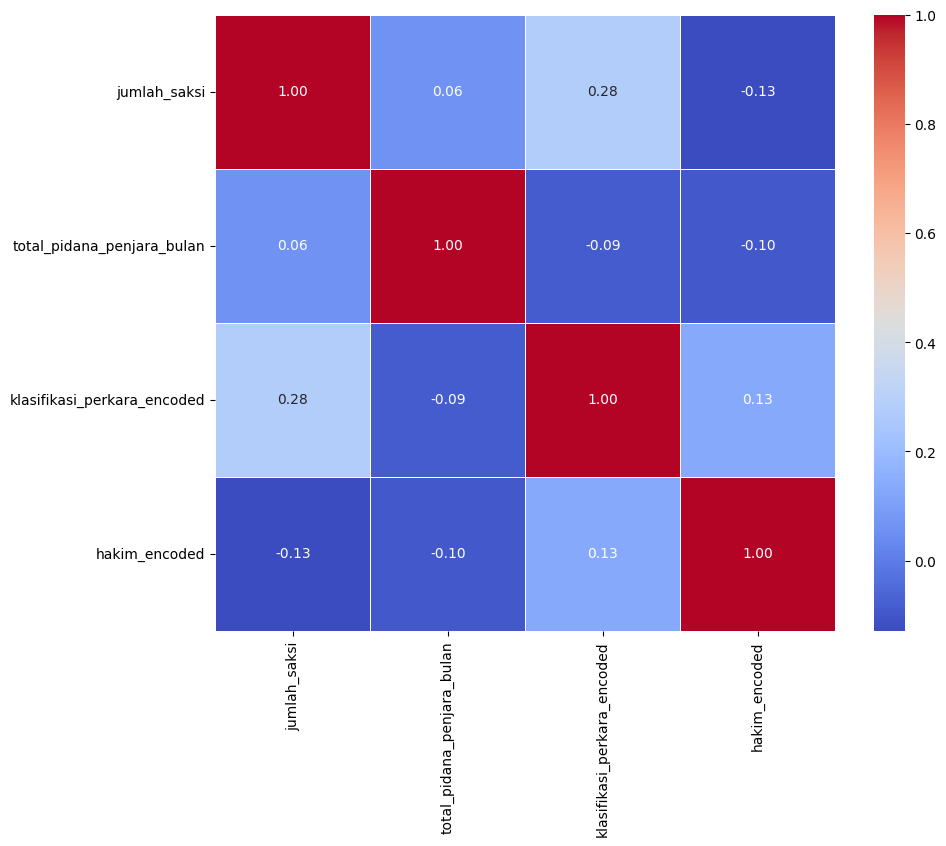

In [109]:
# Generate the correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()


# Model Preprocessing

## Data Normalization

## Text Summarization

In [110]:
df_model.loc[0,'cleaned_dakwaan']

'DAKWAAN\n  PERTAMA \n- Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 sekitar jam 00.30 Wita atau pada suatu waktu dalam bulan Juni 2024 atau setidak-tidaknya dalam tahun 2024 bertempat di pesisir pantai Gondol, Desa Penyabangan, Kec. Gerokgak, Kab. Buleleng, Prov. Bali, atau setidak-tidaknya di suatu tempat yang masih termasuk dalam daerah hukum Pengadilan Negeri Singaraja, dengan sengaja menawarkan atau memberi kesempatan untuk permainan judi yaitu judi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan untuk itu, yang dilakukan antara lain dengan cara sebagai berikut   -\nBahwa pada waktu dan tempat seperti tersebut diatas, pada saat saksi Polisi Dandik Danny Saputra dan saksi I Made Yogi Mahendra melakukan penyelidikan Pesisir Pantai Gerokgak rawan terjadi adanya tindak pidana, selanjutnya melakukan penangkapan terhadap Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG A

In [111]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("CUDA version:", torch.version.cuda)


CUDA available: True
Device count: 1
CUDA version: 12.1


In [112]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3092, 0.4637, 0.5389],
        [0.6815, 0.9689, 0.0069],
        [0.7541, 0.0938, 0.3127],
        [0.8638, 0.1901, 0.0217],
        [0.0092, 0.0146, 0.3554]])


In [113]:
# !nvcc --version

In [114]:
# !nvidia-smi

In [171]:
from transformers import pipeline

# pipe = pipeline("text2text-generation", model="facebook/mbart-large-50", use_fast=False, device="cuda", batch_size=2)
# pipe = pipeline("text2text-generation", model="indobenchmark/indobart-large")
# pipe = pipeline("summarization", model="mrm8488/t5-base-finetuned-indonesian-summarization")
# pipe = pipeline("text2text-generation", model="google/mt5-large", use_fast=False)

# tensorflow_summarization_models = [
#     "thonyyy/pegasus_indonesian_base-finetune",
#     "thonyyy/pegasus_indonesian_base-pretrain"
# ]

pytorch_summarization_models = [
    # "cahya/bert2bert-indonesian-summarization",
    "cahya/t5-base-indonesian-summarization-cased",
    "panggi/t5-small-indonesian-summarization-cased",
    "interstellarx95/mt5-small-finetuned-indonesian-text-summarization-one-epoch",
    "interstellarx95/mt5-small-finetuned-indonesian-text-summarization-v3",
    # "cahya/bert2gpt-indonesian-summarization",
    "panggi/t5-base-indonesian-summarization-cased",
    "rayendito/mt5-small-finetuned-xl-sum-indonesia",
    "interstellarx95/mt5-small-finetuned-indonesian-text-summarization-three-epochs",
    # "rowjak/bert-indonesian-news-summarization"
]


# tensorflow_summarization_pipes = [
#     pipeline("summarization", model=model, from_tf=True, device=0, batch_size=4)
#     for model in tensorflow_summarization_models
# ]

In [167]:
text

'DAKWAAN\n  PERTAMA \n- Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 sekitar jam 00.30 Wita atau pada suatu waktu dalam bulan Juni 2024 atau setidak-tidaknya dalam tahun 2024 bertempat di pesisir pantai Gondol, Desa Penyabangan, Kec. Gerokgak, Kab. Buleleng, Prov. Bali, atau setidak-tidaknya di suatu tempat yang masih termasuk dalam daerah hukum Pengadilan Negeri Singaraja, dengan sengaja menawarkan atau memberi kesempatan untuk permainan judi yaitu judi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan untuk itu, yang dilakukan antara lain dengan cara sebagai berikut   -\nBahwa pada waktu dan tempat seperti tersebut diatas, pada saat saksi Polisi Dandik Danny Saputra dan saksi I Made Yogi Mahendra melakukan penyelidikan Pesisir Pantai Gerokgak rawan terjadi adanya tindak pidana, selanjutnya melakukan penangkapan terhadap Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG A

In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu
import torch
from bert_score import score
from nltk.tokenize import word_tokenize
from nltk.translate import meteor_score
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('punkt')

def evaluate_meteor(generated, reference):
    # Tokenize the generated and reference text
    tokenized_generated = word_tokenize(generated)
    tokenized_reference = word_tokenize(reference)
    
    # Evaluate METEOR score
    score = meteor_score.meteor_score([tokenized_reference], tokenized_generated)
    return score

def evaluate_rouge(generated, reference):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

def evaluate_bleu(generated, reference):
    reference_tokens = reference.split()
    generated_tokens = generated.split()
    score = sentence_bleu([reference_tokens], generated_tokens)
    return score

# BERTScore evaluation
def evaluate_bertscore(generated, reference):
    P, R, F1 = score([generated], [reference], lang="en")
    return F1.item()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kalea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kalea\AppData\Roaming\nltk_data...


In [194]:
import time
import evaluate

text = df_model.loc[0,'cleaned_dakwaan']
print(len(text))
reference_summary = """Terdakwa Ketut Subagia dan Komang Aditya pada 2 Juni 2024 sekitar pukul 00.30 WITA di pesisir pantai Gondol, Desa Penyabangan, Kecamatan Gerokgak, Kabupaten Buleleng, Bali, diduga mengadakan permainan judi bola adil secara ilegal. Ketut Subagia bertindak sebagai penyelenggara dan pemodal, sementara Komang Aditya membantu sebagai pekerja yang merapikan uang taruhan serta menyerahkannya kepada pemenang. Permainan melibatkan papan bergambar, bola karet, perlak bergambar, dan cek kayu sebagai pengganti uang taruhan. Barang bukti yang disita meliputi papan bola adil, tas, perlak, bola karet, kayu penyeimbang, bedak bayi, cek kayu dalam berbagai denominasi, lap, dan uang tunai Rp1.108.000. Permainan tersebut dilakukan dengan sistem taruhan yang memberikan hadiah kelipatan sembilan kali lipat dari jumlah taruhan jika menang, namun peserta yang kalah kehilangan uangnya. Aktivitas ini berlangsung selama beberapa jam dengan melibatkan sekitar 20 pemain dan keuntungan digunakan untuk kebutuhan sehari-hari. Namun, kegiatan ini dilakukan tanpa izin resmi dan melanggar hukum, sehingga kedua terdakwa ditangkap dan diancam pidana berdasarkan Pasal 303 KUHP juncto Undang-Undang Nomor 7 Tahun 1974 tentang Penertiban Perjudian."""

for i, model in enumerate(pytorch_summarization_models):
    print(model)
    pipe = pipeline("summarization", model=model, device="cuda", batch_size=4, use_fast=False) 
    chunk_size = 512 

    start_time = time.time()

    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
    try:
        summaries = [pipe(chunk, max_length=30, min_length=20, do_sample=False)[0]['generated_text'] for chunk in chunks]
    except KeyError:
        summaries = [pipe(chunk, max_length=30, min_length=20, do_sample=False)[0]['summary_text'] for chunk in chunks]

    full_summary = " ".join(summaries)
    end_time = time.time()

    time_taken = end_time - start_time

    print("------------------------------------------------------")

    rouge_scores = evaluate_rouge(full_summary, reference_summary)
    print("ROUGE Scores:", rouge_scores)
    meteor_score_value = evaluate_meteor(full_summary, reference_summary)
    print("METEOR Score:", meteor_score_value)
    bleu_score_value = evaluate_bleu(full_summary, reference_summary)
    print("BLEU Score:", bleu_score_value)
    bertscore_value = evaluate_bertscore(full_summary, reference_summary)
    print("BERTScore F1:", bertscore_value)

    # Display ROUGE scores
    print(len(full_summary))
    print(f"Summary: using {model}: {full_summary}")
    print("------------------------------------------------------")

    del pipe
    torch.cuda.empty_cache()

    print(f"Time taken for summarization: {time_taken:.2f} seconds\n\n")


21776
cahya/t5-base-indonesian-summarization-cased
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.11449451887941535, recall=0.5497076023391813, fmeasure=0.18951612903225806), 'rouge2': Score(precision=0.04024390243902439, recall=0.19411764705882353, fmeasure=0.06666666666666667), 'rougeL': Score(precision=0.07429963459196103, recall=0.3567251461988304, fmeasure=0.12298387096774192), 'rougeLsum': Score(precision=0.07429963459196103, recall=0.3567251461988304, fmeasure=0.12298387096774192)}
METEOR Score: 0.2737574220496995
BLEU Score: 0.01669053970928304


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8316876292228699
5476
Summary: using cahya/t5-base-indonesian-summarization-cased: DAKWAAN PERTAMA - Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada saat terdakwa KETUT SUBAGIA bersama dengan Terdakwa UT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai Gondol, Desa Penya Dua buah bola bergambar, satu (satu) buah tas kain warna abu-abu, satu (satu) buah tas karung warna Sebanyak 44 (empat puluh empat) buah papan cek kayu berwarna biru dengan nomor 20 (duapuluh), 17 (tujuh belas) KETUT SUBAGIA dalam permainan judi bola adil tersebut berperan sebagai penyelenggara yang mengadakan permainan judi bola adil dan juga sebagai penyelenggara yang mengadakan permainan KOMANG ADITYA sebagai pekerja dan merapikan uang serta memberikan uang kepada pemenang permainan bola adil. Bahwa dalam permainan judi bola adil Pasangan uang taruhan judi bola adil 1 (satu)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8341520428657532
5481
Summary: using panggi/t5-small-indonesian-summarization-cased: Bahwa Terdakwa KETUT SUBAGIA bersama dengan terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 udi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan untuk itu, yang dilakukan antara lain dengan cara sebagai UT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai Gondol, Desa Penya bola bergambar, 1 (satu) buah tas kain warna abu-abu. 1 biji biji bola karet warna hitam, 2 biji kacang uh), 44 (empat puluh empat) buah papan cek kayu berwarna biru dengan nomor 20 'duapuluh - duapuluh Rp. 50.000,- (lima puluh ribu rupiah) 4 [empat) lembar uang pecahan Rp yang 20.00, hingga pemodal, mengambil uang - uang taruhan yang berada di atas perlak, menggelindingkan bola, sedangkan Terdakwa KOMANG pan bola adil 1 (satu ) buah perlak bergambar digunakan untuk pasangan uang taruhan judi bola saks

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.826798677444458
4523
Summary: using interstellarx95/mt5-small-finetuned-indonesian-text-summarization-one-epoch: KeTUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 sekitar jam 0 KeTUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada saat terdakwa KETSUBAGIA bersama dengan Terdakwa KOMANG KeTUT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai Kembaran cek kayu berwarna hijau dengan nomor 5 (lima) buah papan cek kayu berwarna hijau dengan Kediaman uang pecahan Rp. 1.108.000,- (satu juta seratus delapan ribu rupiah) terdiri dari 8 ( KeTUT SUBAGIA dalam permainan judi bola adil tersebut berperan sebagai penyelenggara yang mengadakan permainan judi bola adil dan Kepolisian pemodal, mengambil uang - uang taruhan yang berada di atas perlak, menggelindingkan bola Plak bergambar digunakan untuk pasangan uang taruhan judi bola adil 1 (satu) buah perlak bergambar digunakan Kegunaan papan 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8306238651275635
4355
Summary: using interstellarx95/mt5-small-finetuned-indonesian-text-summarization-v3: Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 udi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan UT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai Bola bergambar, 1(satu) buah tas kain warna abu-abu, 1(satu) buah perlak bergambar, uh), 44(empat puluh empat) buah papan cek kayu berwarna biru dengan nomor 20(duapuluh Rp. 50.000,-(lima puluh ribu rupiah) 4(empat) lembar uang pecahan Rp. 50.000,- Pemodal, mengambil uang - uang taruhan yang berada di atas perlak, menggelindingkan bola, sedangkan Pan bola adil 1(satu) buah perlak bergambar digunakan untuk pasangan uang taruhan bola adil 1(satu s kain warna hitam digunakan untuk penyimpan bola 4(empat) buah kayu penyeimbang digunakan untuk menyeimbangkan n 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8033068180084229
176
Summary: using panggi/t5-base-indonesian-summarization-cased:                 Bahwa di papan bola adil terdapat 4 warna yaitu merah, kuning hijau dan hitam adapun gambarnya yaitu berbentuk segitiga, palang, bola,                          
------------------------------------------------------
Time taken for summarization: 17.62 seconds


rayendito/mt5-small-finetuned-xl-sum-indonesia
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.13062409288824384, recall=0.5263157894736842, fmeasure=0.20930232558139536), 'rouge2': Score(precision=0.0436046511627907, recall=0.17647058823529413, fmeasure=0.06993006993006994), 'rougeL': Score(precision=0.06676342525399129, recall=0.26900584795321636, fmeasure=0.10697674418604652), 'rougeLsum': Score(precision=0.06676342525399129, recall=0.26900584795321636, fmeasure=0.10697674418604652)}
METEOR Score: 0.2945929244287108
BLEU Score: 0.017863480491804782


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8162375688552856
4457
Summary: using rayendito/mt5-small-finetuned-xl-sum-indonesia: Seorang terdakwa kecelakaan pertama - telah mendakwa seorang terdakwa kecelakaan pertama - setelah Polisi dan saksi Polisi dan saksi Polisi dan saksi Polisi dan saksi Polisi dan saksi Polisi dan Seorang pemain bola adil di Bali telah berlangsung permainan perjudian bola adil di pesisir pantai Gondol, Kec Sebuah tas kain warna hitam, 1 (satu) buah tas kain warna hitam, 1 (satu) buah tas Sebuah lembar uang pecahan Rp. 1.108.000,- (satu juta seratus delapan ribu rupiah) terdiri dari Seorang terdakwa keTUT SUBAGIA dalam permainan judi bola adil di Indonesia, telah mendakwa terdakwa keTUT Suba Pemenang permainan bola adil di Indonesia, telah menentukan kemenangan dalam permainan bola adil, karena seorang pemodal Permainan bola adil 1 (satu) buah tas karung warna biru garis merah digunakan untuk pasangan uang Sebuah papan cek kayu berwarna hitam digunakan untuk penyimpan bola adil setelah dig

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8330612778663635
4361
Summary: using interstellarx95/mt5-small-finetuned-indonesian-text-summarization-three-epochs: Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 udi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan UT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai buah tas kain warna abu-abu, 1 (satu) buah perlak bergambar, 1 (satu) buah perlak uang pecahan Rp. 1.108.000,- (satu juta seratus delapan ribu rupiah) terdiri dari 8 (delapan Terdakwa KETUT SUBAGIA dalam permainan judi bola adil tersebut berperan sebagai penyelenggara yang mengadakan permainan judi bola Pemodal, mengambil uang - uang taruhan yang berada di atas perlak, menggelindingkan bola, sedangkan PAN bola adil 1 (satu) buah perlak bergambar digunakan untuk pasangan uang taruhan bola adil 1 (satu s kain warna hitam digunakan untuk penyimpan b

In [193]:
import time
import evaluate

text = df_model.loc[0,'cleaned_dakwaan']
print(len(text))
reference_summary = """Terdakwa Ketut Subagia dan Komang Aditya pada 2 Juni 2024 sekitar pukul 00.30 WITA di pesisir pantai Gondol, Desa Penyabangan, Kecamatan Gerokgak, Kabupaten Buleleng, Bali, diduga mengadakan permainan judi bola adil secara ilegal. Ketut Subagia bertindak sebagai penyelenggara dan pemodal, sementara Komang Aditya membantu sebagai pekerja yang merapikan uang taruhan serta menyerahkannya kepada pemenang. Permainan melibatkan papan bergambar, bola karet, perlak bergambar, dan cek kayu sebagai pengganti uang taruhan. Barang bukti yang disita meliputi papan bola adil, tas, perlak, bola karet, kayu penyeimbang, bedak bayi, cek kayu dalam berbagai denominasi, lap, dan uang tunai Rp1.108.000. Permainan tersebut dilakukan dengan sistem taruhan yang memberikan hadiah kelipatan sembilan kali lipat dari jumlah taruhan jika menang, namun peserta yang kalah kehilangan uangnya. Aktivitas ini berlangsung selama beberapa jam dengan melibatkan sekitar 20 pemain dan keuntungan digunakan untuk kebutuhan sehari-hari. Namun, kegiatan ini dilakukan tanpa izin resmi dan melanggar hukum, sehingga kedua terdakwa ditangkap dan diancam pidana berdasarkan Pasal 303 KUHP juncto Undang-Undang Nomor 7 Tahun 1974 tentang Penertiban Perjudian."""

for i, model in enumerate(pytorch_summarization_models):
    print(model)
    pipe = pipeline("summarization", model=model, device="cuda", batch_size=4, use_fast=False) 
    chunk_size = 512 

    start_time = time.time()

    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
    try:
        summaries = [pipe(chunk, max_length=60, min_length=40, do_sample=False)[0]['generated_text'] for chunk in chunks]
    except KeyError:
        summaries = [pipe(chunk, max_length=60, min_length=40, do_sample=False)[0]['summary_text'] for chunk in chunks]

    full_summary = " ".join(summaries)
    end_time = time.time()

    time_taken = end_time - start_time

    print("------------------------------------------------------")

    rouge_scores = evaluate_rouge(full_summary, reference_summary)
    print("ROUGE Scores:", rouge_scores)
    meteor_score_value = evaluate_meteor(full_summary, reference_summary)
    print("METEOR Score:", meteor_score_value)
    bleu_score_value = evaluate_bleu(full_summary, reference_summary)
    print("BLEU Score:", bleu_score_value)
    bertscore_value = evaluate_bertscore(full_summary, reference_summary)
    print("BERTScore F1:", bertscore_value)

    # Display ROUGE scores
    print(len(full_summary))
    # print(f"Summary: using {model}: {full_summary}")
    print("------------------------------------------------------")

    del pipe
    torch.cuda.empty_cache()

    print(f"Time taken for summarization: {time_taken:.2f} seconds\n\n")


21776
cahya/t5-base-indonesian-summarization-cased
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.0728476821192053, recall=0.7076023391812866, fmeasure=0.13209606986899564), 'rouge2': Score(precision=0.02710843373493976, recall=0.2647058823529412, fmeasure=0.04918032786885246), 'rougeL': Score(precision=0.052378085490668275, recall=0.5087719298245614, fmeasure=0.09497816593886464), 'rougeLsum': Score(precision=0.052378085490668275, recall=0.5087719298245614, fmeasure=0.09497816593886464)}
METEOR Score: 0.24838405513027267
BLEU Score: 0.011384494662711611


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8229100704193115
11014
------------------------------------------------------
Time taken for summarization: 34.53 seconds


panggi/t5-small-indonesian-summarization-cased
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.07314285714285715, recall=0.7485380116959064, fmeasure=0.13326392503904216), 'rouge2': Score(precision=0.030303030303030304, recall=0.31176470588235294, fmeasure=0.055237102657634186), 'rougeL': Score(precision=0.05142857142857143, recall=0.5263157894736842, fmeasure=0.09370119729307652), 'rougeLsum': Score(precision=0.05142857142857143, recall=0.5263157894736842, fmeasure=0.09370119729307652)}
METEOR Score: 0.27411036608588657
BLEU Score: 0.012264420925907894


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8367627263069153
11264
------------------------------------------------------
Time taken for summarization: 24.90 seconds


interstellarx95/mt5-small-finetuned-indonesian-text-summarization-one-epoch
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.08502633559066967, recall=0.6608187134502924, fmeasure=0.15066666666666667), 'rouge2': Score(precision=0.03162650602409638, recall=0.24705882352941178, fmeasure=0.05607476635514018), 'rougeL': Score(precision=0.06019563581640331, recall=0.4678362573099415, fmeasure=0.10666666666666666), 'rougeLsum': Score(precision=0.06019563581640331, recall=0.4678362573099415, fmeasure=0.10666666666666666)}
METEOR Score: 0.256727945764017
BLEU Score: 0.013152770193043332


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8171529769897461
8823
------------------------------------------------------
Time taken for summarization: 30.92 seconds


interstellarx95/mt5-small-finetuned-indonesian-text-summarization-v3
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.12133891213389121, recall=0.6783625730994152, fmeasure=0.2058562555456965), 'rouge2': Score(precision=0.048167539267015703, recall=0.27058823529411763, fmeasure=0.08177777777777777), 'rougeL': Score(precision=0.07531380753138076, recall=0.42105263157894735, fmeasure=0.1277728482697427), 'rougeLsum': Score(precision=0.07531380753138076, recall=0.42105263157894735, fmeasure=0.1277728482697427)}
METEOR Score: 0.33105992204196766
BLEU Score: 0.022741947569814742


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8357853889465332
6053
------------------------------------------------------
Time taken for summarization: 22.78 seconds


panggi/t5-base-indonesian-summarization-cased
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.2564102564102564, recall=0.05847953216374269, fmeasure=0.09523809523809523), 'rouge2': Score(precision=0.05263157894736842, recall=0.011764705882352941, fmeasure=0.01923076923076923), 'rougeL': Score(precision=0.23076923076923078, recall=0.05263157894736842, fmeasure=0.08571428571428572), 'rougeLsum': Score(precision=0.23076923076923078, recall=0.05263157894736842, fmeasure=0.08571428571428572)}
METEOR Score: 0.055991041433370664
BLEU Score: 1.7916417270606492e-156


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8035668730735779
308
------------------------------------------------------
Time taken for summarization: 34.00 seconds


rayendito/mt5-small-finetuned-xl-sum-indonesia
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.10062893081761007, recall=0.5614035087719298, fmeasure=0.1706666666666667), 'rouge2': Score(precision=0.033578174186778595, recall=0.18823529411764706, fmeasure=0.05699020480854852), 'rougeL': Score(precision=0.05555555555555555, recall=0.30994152046783624, fmeasure=0.09422222222222223), 'rougeLsum': Score(precision=0.05555555555555555, recall=0.30994152046783624, fmeasure=0.09422222222222223)}
METEOR Score: 0.2726492670718627
BLEU Score: 0.013498977541361845


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.8103804588317871
6168
------------------------------------------------------
Time taken for summarization: 23.02 seconds


interstellarx95/mt5-small-finetuned-indonesian-text-summarization-three-epochs
------------------------------------------------------
ROUGE Scores: {'rouge1': Score(precision=0.10659439927732611, recall=0.6900584795321637, fmeasure=0.18466353677621283), 'rouge2': Score(precision=0.04159132007233273, recall=0.27058823529411763, fmeasure=0.07210031347962383), 'rougeL': Score(precision=0.07317073170731707, recall=0.47368421052631576, fmeasure=0.12676056338028166), 'rougeLsum': Score(precision=0.07317073170731707, recall=0.47368421052631576, fmeasure=0.12676056338028166)}
METEOR Score: 0.30658265990960154
BLEU Score: 0.018827928157299167


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.845614492893219
7180
------------------------------------------------------
Time taken for summarization: 27.94 seconds




In [119]:
print(len(text))
print(len(full_summary))
print("Summary:", full_summary)

21776
15960
Summary: DAKWAAN PERTAMA - Bahwa Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITYA pada hari Minggu tanggal 02 Juni 2024 sekitar jam 00.30 Wita atau pada suatu waktu dalam bulan Juni 2024 atau setidak-tidaknya dalam tahun 2024 bertempat di pesisir pantai Gondol, Desa Penyabangan, Kec. Gerokgak, Kab. Buleleng, Prov. Bali, atau setidak- udi bola adil dan menjadikan sebagai pencaharian, atau dengan sengaja turut serta dalam suatu perusahaan untuk itu, yang dilakukan antara lain dengan cara sebagai berikut - Bahwa pada waktu dan tempat seperti tersebut diatas, pada saat saksi Polisi Dandik Danny Saputra dan saksi I Made Yogi Mahendra melakukan penyelidikan Pesisir Pantai Gerokgak rawan terjadi adanya tindak pidana, selanjutnya melakukan penangkapan terhadap Terdakwa KETUT SUBAGIA bersama dengan Terdakwa KOMANG ADITY UT SUBAGIA dan Terdakwa KOMANG ADITYA sedang berlangsung permainan perjudian bola adil di pesisir pantai Gondol, Desa Penyabangan, Kec. Gerokgak, Kab. Bu

ModuleNotFoundError: No module named 'evaluate'